# Introduction: Home Credit Default Risk Prediction

This task is to use historical loan application data to predict whether or not an applicant will be able to repay a loan.

This is a standard supervised classification task

In the dataset, each row contains information about a loan application including TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.



# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score



# Load the Data

In [ ]:
pd.options.display.max_rows = 4000


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
link = 'https://drive.google.com/file/d/1-dXRO1eJTr2xMo92zEt4Cg66KRpeG7Od/view'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('home_loan.csv') 
 
df = pd.read_csv('home_loan.csv')
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.shape

(307511, 122)

In [ ]:
df.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [ ]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Distribution of Target Variable
The target variable defines whether the loan was repayed or not.

Text(0.5, 1.0, 'Distribution of TARGET variable')

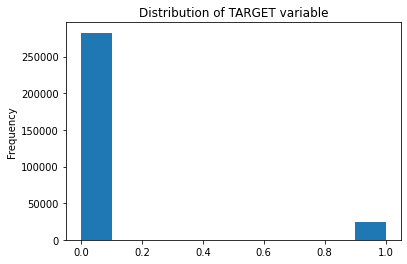

In [ ]:
df['TARGET'].astype(int).plot.hist();
plt.title("Distribution of TARGET variable")

The target variable is imbalanced with the majority of applicants has the target equals to zero which indicates that individuals repaying the loan which is about 280k applicants. While only about 24k applicants in this dataset involved the applicants who has not repaid the loan.

In [ ]:
df.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [ ]:
df.select_dtypes('int64').nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [ ]:
df.select_dtypes('float64').nunique()

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

### Examine Missing Values

In [ ]:
missing_values = df.isnull().sum()*100/df.isnull().count()
missing_values.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [ ]:
df.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
df_cat = df.select_dtypes('object').columns

In [ ]:
missing_values_cat = df[df_cat].isnull().sum()*100/df[df_cat].isnull().count()
missing_values_cat.sort_values(ascending=False)

FONDKAPREMONT_MODE            68.386172
WALLSMATERIAL_MODE            50.840783
HOUSETYPE_MODE                50.176091
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

## Data Exploration

### Correlation coefficient

let's look into the corelation of different features w.r.t target and relationship between the features.

In [ ]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


In [ ]:
corrmat_df = df.corr()

In [ ]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

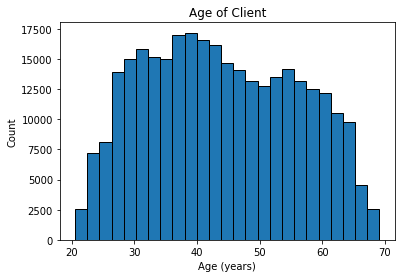

In [ ]:
# Plot the distribution of applicants age in years
plt.hist(abs(df['DAYS_BIRTH']) / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

seems like the applicant age are valid ranging betweeen 20 and 70 and doesnot contain any outliers.

To look at the effect of age on the target, let's make a kde plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


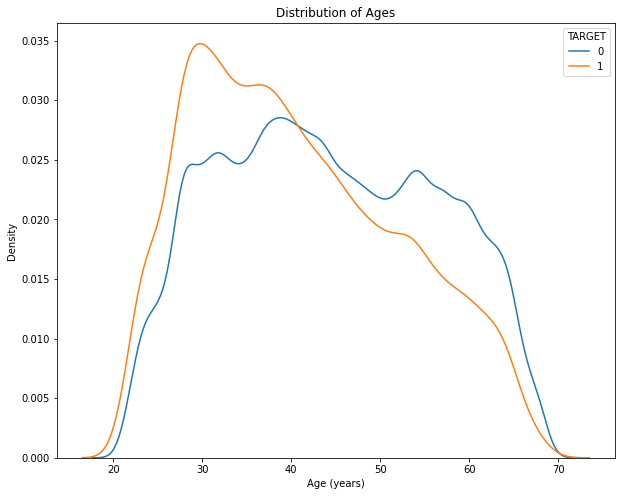

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, hue=df['TARGET'])

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, hue=df['TARGET'])

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target==1 curve, which represents the applicants who couldn't repay the loan, skews towards left i.e younger end of the age.

let's find the repayment failed per age group to get more info on loan repayment trend by age group

To do that
1. cut the age category into bins of 5 years each
2. average value of each group = No of rows for that group where target=1 /total number of entries for that group
3. plot Age group v/s failure to repay(%)

In [ ]:
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['AGE'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TARGET,DAYS_BIRTH,AGE,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
age_groups = age_data.groupby('YEARS_BINNED')[['TARGET']].mean()

Text(0.5, 1.0, 'Failure to repay by Age Group')

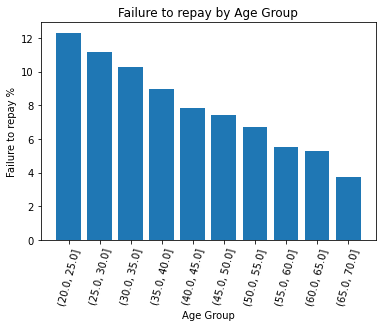

In [ ]:
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group')
plt.ylabel('Failure to repay %')
plt.title('Failure to repay by Age Group')

From the above plot, it is clear that younger applicants are less likely to repay the loan. The rate of failure to repay is above 10% for the youngest age group and below 5% for oldest age group.

Now let's find correlations with applicant's age 

In [ ]:
correlations = corrmat_df['DAYS_BIRTH'].sort_values(ascending=False)

# Display correlations
print('Most Correlations:\n', correlations.head(15))


Most Correlations:
 DAYS_BIRTH                    1.000000
DAYS_EMPLOYED                 0.615864
EXT_SOURCE_1                  0.600610
FLAG_DOCUMENT_6               0.407160
EXT_SOURCE_3                  0.205478
EXT_SOURCE_2                  0.091996
AMT_REQ_CREDIT_BUREAU_YEAR    0.071983
AMT_CREDIT                    0.055436
AMT_GOODS_PRICE               0.053442
FLAG_PHONE                    0.042402
REGION_POPULATION_RELATIVE    0.029582
FLAG_CONT_MOBILE              0.014985
AMT_REQ_CREDIT_BUREAU_QRT     0.011799
ENTRANCES_AVG                 0.010281
ENTRANCES_MEDI                0.009876
Name: DAYS_BIRTH, dtype: float64


We can see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age. 

Exterior Sources

From the description,  EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 represents normalized scores from external data sources. let's look at these variables

In [ ]:
#  Extract the EXT_SOURCE variables and show correlations
ext_data = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


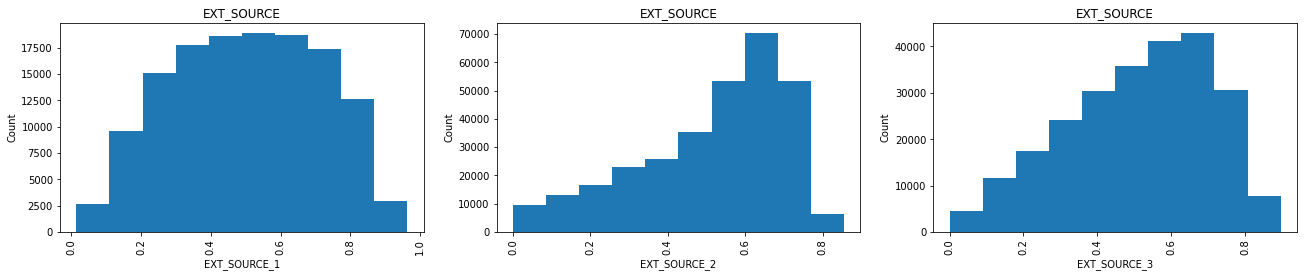

In [ ]:
plt.figure(figsize=(30, 50))
for index, column in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
  plt.subplot(11, 4, index+1)
  plt.hist(df[column])
  plt.title(f"EXT_SOURCE")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.xticks(rotation='vertical')
# plt.tight_layout()
plt.show()

From the above distributions,  it seems that there are no outliers and the scores are reasonable i.e between 0 and 1.

let's now visualize the effect of these variables on the target


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

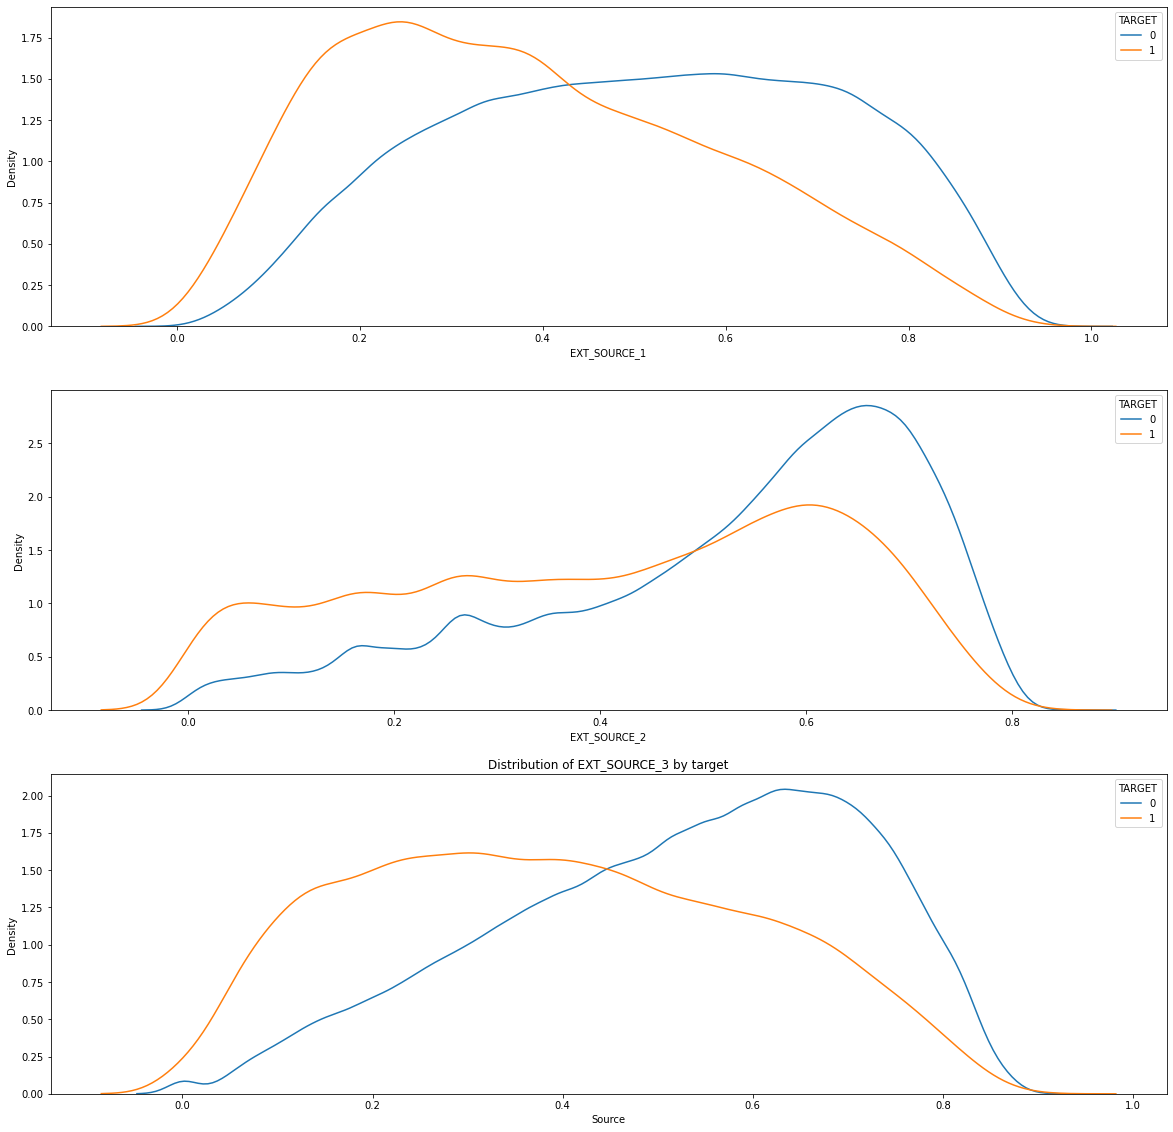

In [ ]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
  plt.subplot(3, 1, i+1)
  # KDE plot of loans that were repaid on time
  sns.kdeplot(df.loc[df['TARGET'] == 0, col], hue=df['TARGET'])

  # KDE plot of loans which were not repaid on time
  sns.kdeplot(df.loc[df['TARGET'] == 1, col], hue=df['TARGET'])

# Labeling of plot
plt.xlabel('Source'); plt.ylabel('Density'); plt.title(f'Distribution of {col} by target');

From the above plots especially from EXT_SOURCE_3, it looks like most of the applicants who repaid the loan tend to have the higher credit scores compared to those who have not. It seems that these variables be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

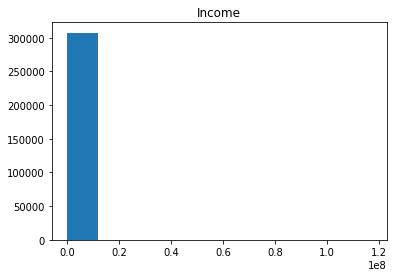

In [ ]:
plt.hist(df["AMT_INCOME_TOTAL"])
plt.title("Income")

# plt.tight_layout()
plt.show()

In [ ]:
df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
df["AMT_INCOME_TOTAL"].head(10)

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
6    171000.0
7    360000.0
8    112500.0
9    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


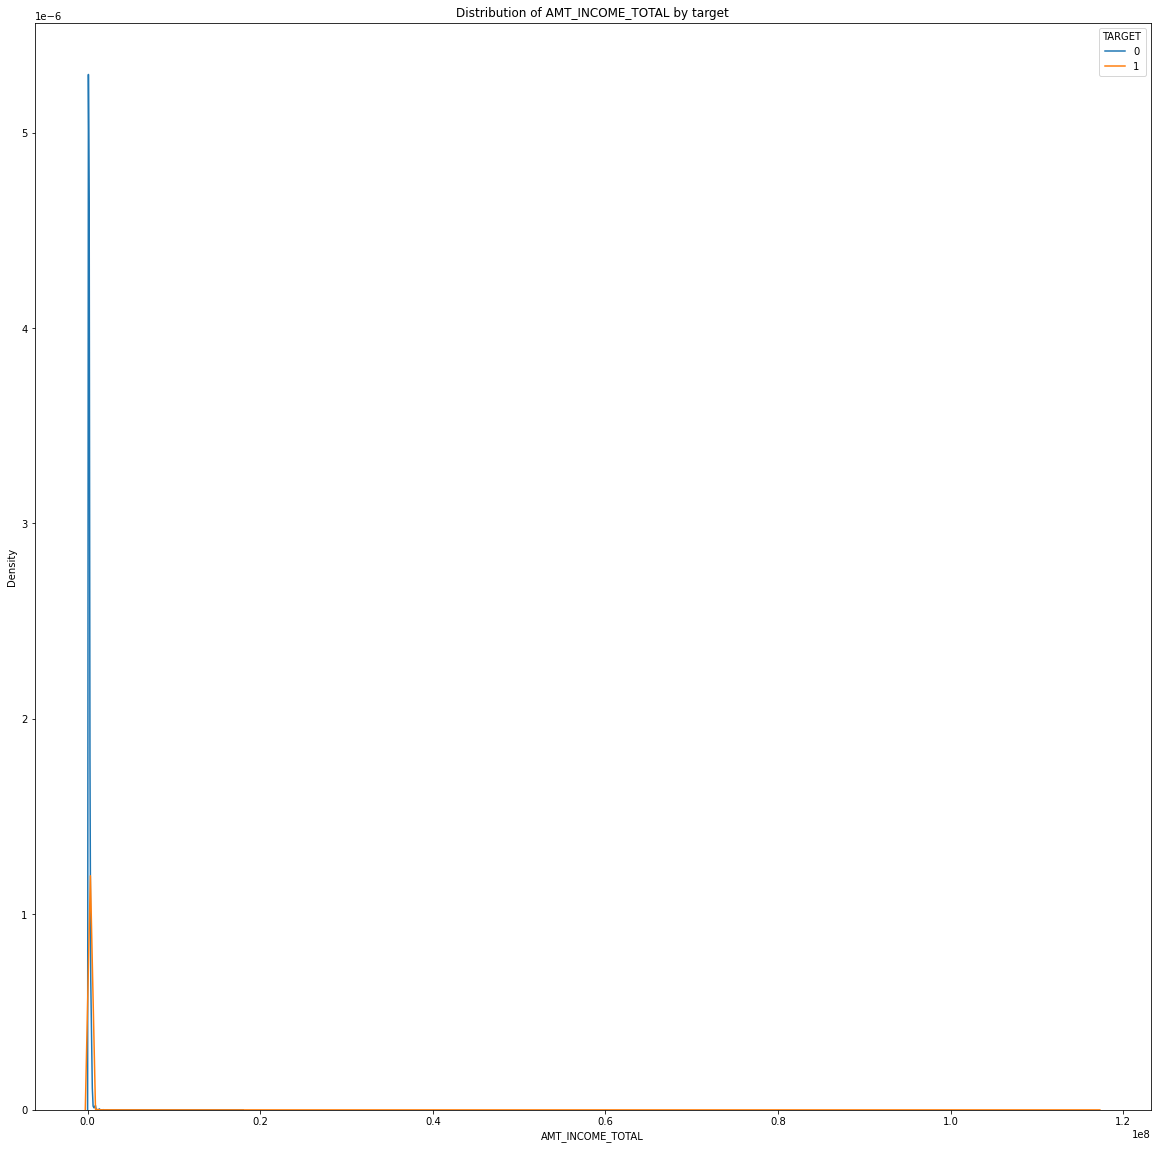

In [ ]:
plt.figure(figsize = (20, 20))
# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, "AMT_INCOME_TOTAL"], hue=df['TARGET'])

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, "AMT_INCOME_TOTAL"], hue=df['TARGET'])

# Labeling of plot
plt.xlabel('AMT_INCOME_TOTAL'); plt.ylabel('Density'); plt.title(f'Distribution of AMT_INCOME_TOTAL by target');

In [ ]:
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

In [ ]:
df['CREDIT_INCOME_PERCENT'].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: CREDIT_INCOME_PERCENT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


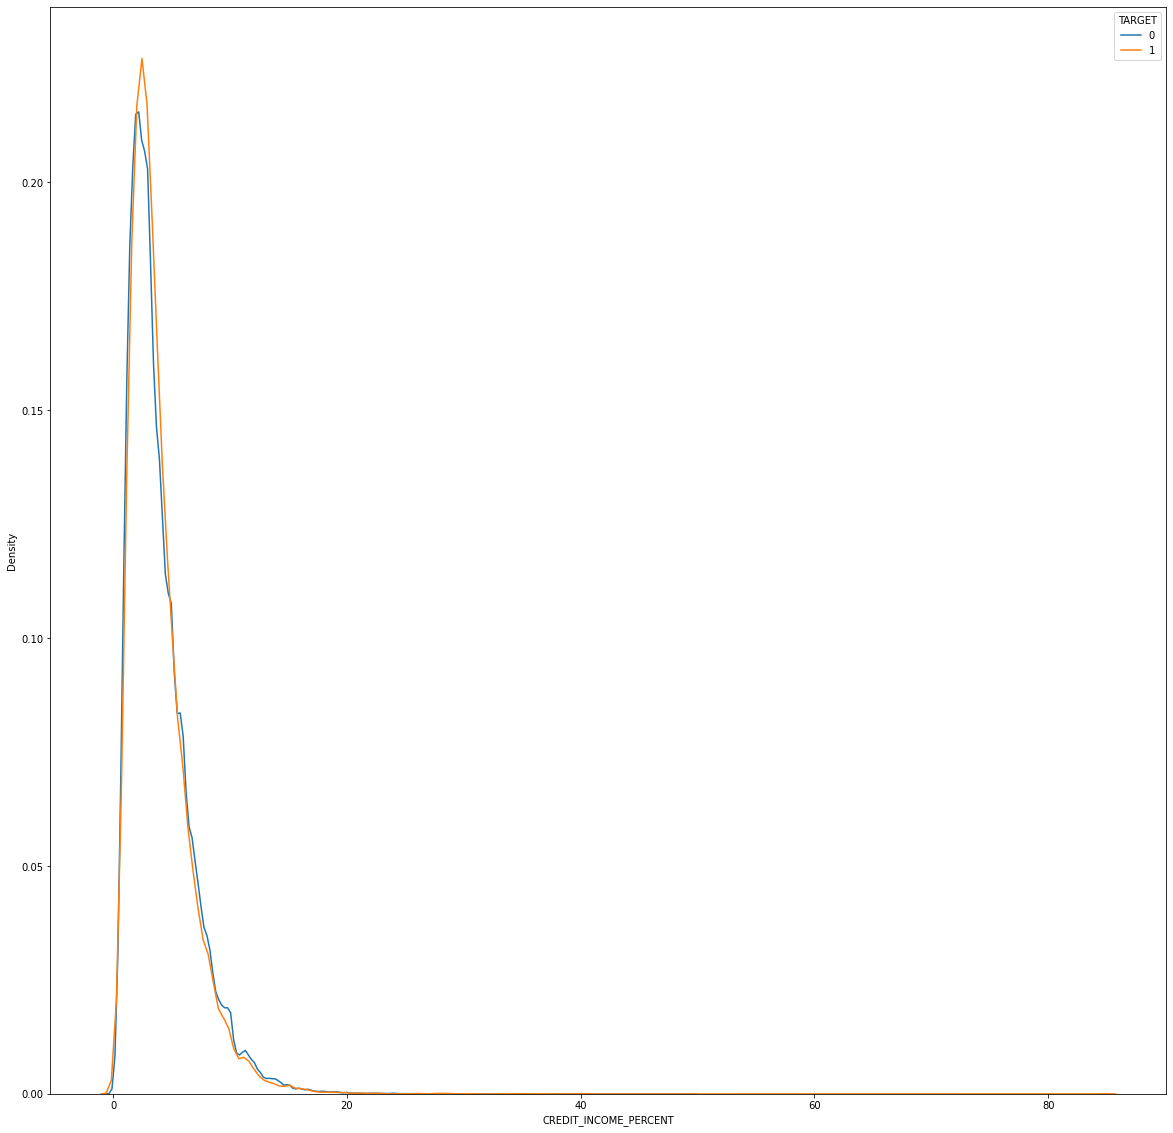

In [ ]:
plt.figure(figsize = (20, 20))
sns.kdeplot(df.loc[df['TARGET'] == 0, "CREDIT_INCOME_PERCENT"], hue=df['TARGET'])

sns.kdeplot(df.loc[df['TARGET'] == 1, "CREDIT_INCOME_PERCENT"], hue=df['TARGET'])

### Family Status of Applicants

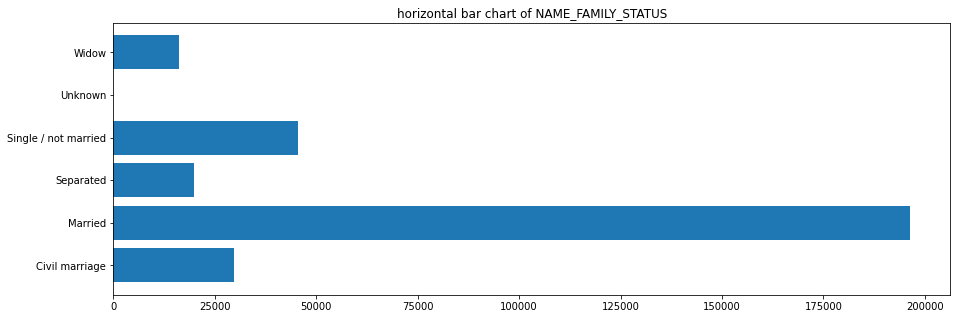

In [ ]:
# Bar chart of grades
plt.figure(figsize=(15,5))
plt.barh(df.groupby("NAME_FAMILY_STATUS")["NAME_FAMILY_STATUS"].count().index, 
        df.groupby("NAME_FAMILY_STATUS")["NAME_FAMILY_STATUS"].count())
plt.title("horizontal bar chart of NAME_FAMILY_STATUS")

plt.show()

In [ ]:
df["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Married people have applied for a larger number of loan applications about 196K

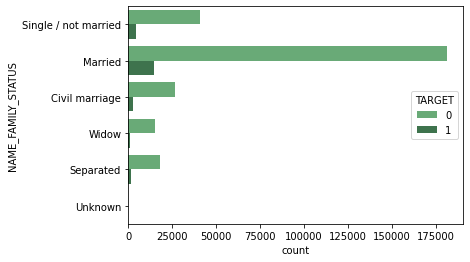

In [ ]:
# Plot counts for each combination of levels.
sns.countplot(y="NAME_FAMILY_STATUS", hue="TARGET", data=df, palette="Greens_d")
plt.show()

seems like  'Married' people has the highest percentage of loan problems as 


### Does applicants own Real Estate or Car

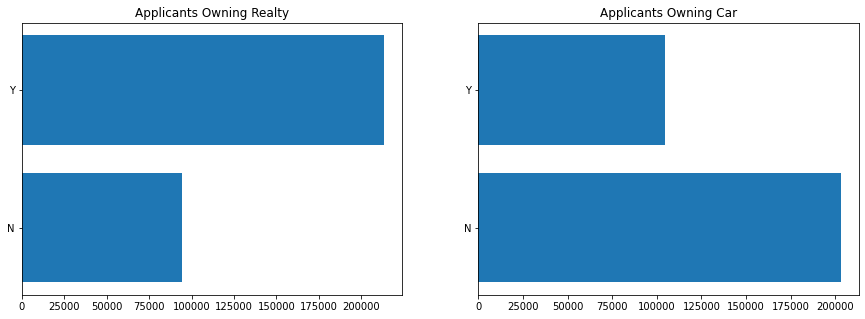

In [ ]:
# Bar chart of grades
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.barh(df.groupby("FLAG_OWN_REALTY")["FLAG_OWN_REALTY"].count().index, 
        df.groupby("FLAG_OWN_REALTY")["FLAG_OWN_REALTY"].count())
plt.title("Applicants Owning Realty")
plt.subplot(1, 2, 2)
plt.barh(df.groupby("FLAG_OWN_CAR")["FLAG_OWN_CAR"].count().index, 
        df.groupby("FLAG_OWN_CAR")["FLAG_OWN_CAR"].count())
plt.title("Applicants Owning Car")


plt.show()

About 200k of the applicants own Real Estate, while only around 100k of applicants own Car

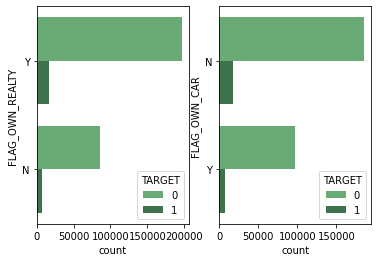

In [ ]:
# Plot counts for each combination of levels.
plt.subplot(1, 2, 1)
sns.countplot(y="FLAG_OWN_REALTY", hue="TARGET", data=df, palette="Greens_d")
plt.subplot(1, 2, 2)
sns.countplot(y="FLAG_OWN_CAR", hue="TARGET", data=df, palette="Greens_d")

plt.show()

From the above plot, there is no relation saying that applicants who didnot own Realty have difficulties paying the loan. However, for those applicants who did not own a car, it is observed that there is higher number of people who haven't repaid when compared to applicants who owns a car

### Suite Type and Income Type of Applicants

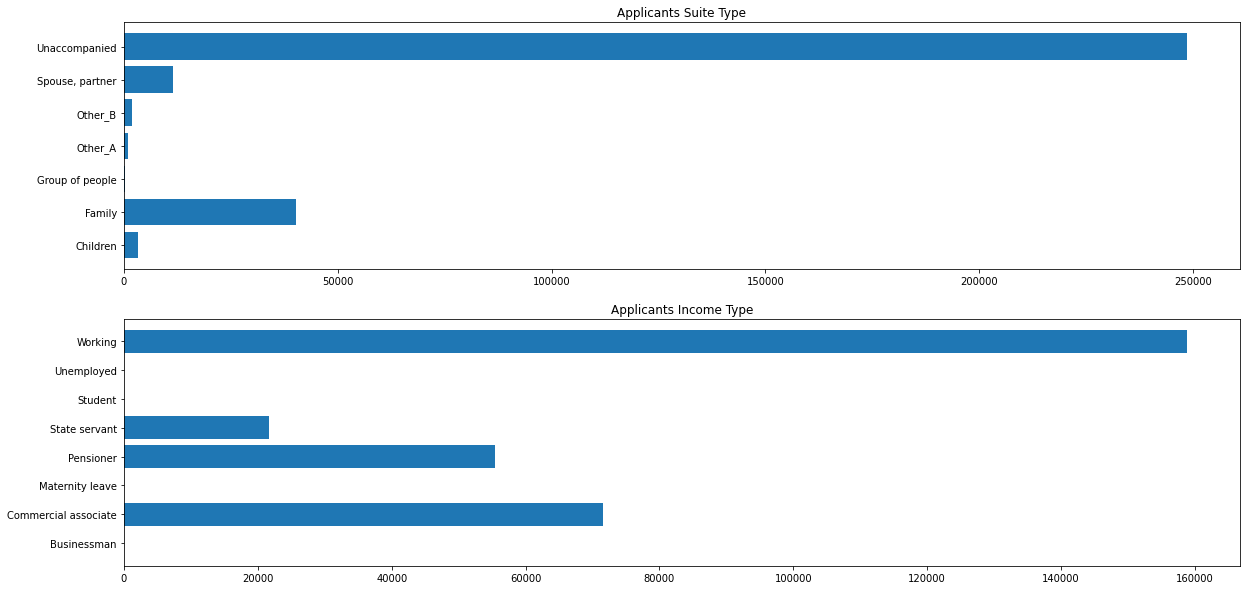

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.barh(df.groupby("NAME_TYPE_SUITE")["NAME_TYPE_SUITE"].count().index, 
        df.groupby("NAME_TYPE_SUITE")["NAME_TYPE_SUITE"].count())
plt.title("Applicants Suite Type")
plt.subplot(2, 1, 2)
plt.barh(df.groupby("NAME_INCOME_TYPE")["NAME_INCOME_TYPE"].count().index, 
        df.groupby("NAME_INCOME_TYPE")["NAME_INCOME_TYPE"].count())
plt.title("Applicants Income Type")


plt.show()

In [ ]:
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Top 3 Type Suites which applies for the loan are the houses which are:


```
- Unaccompanied (about 248K applicants)
- Family (about 40K applicants)
- Spouse, Partner (about 11K applicants)
```

The income type of people who applies for loan include 8 categories, top ones are : 


```
- Working Class (about 158K applicants)
- Commercial associate (about 71K applicants)
- Pensioner (about 55k applicants)
```




How does Target Varies with Suite and Income Type of Applicants

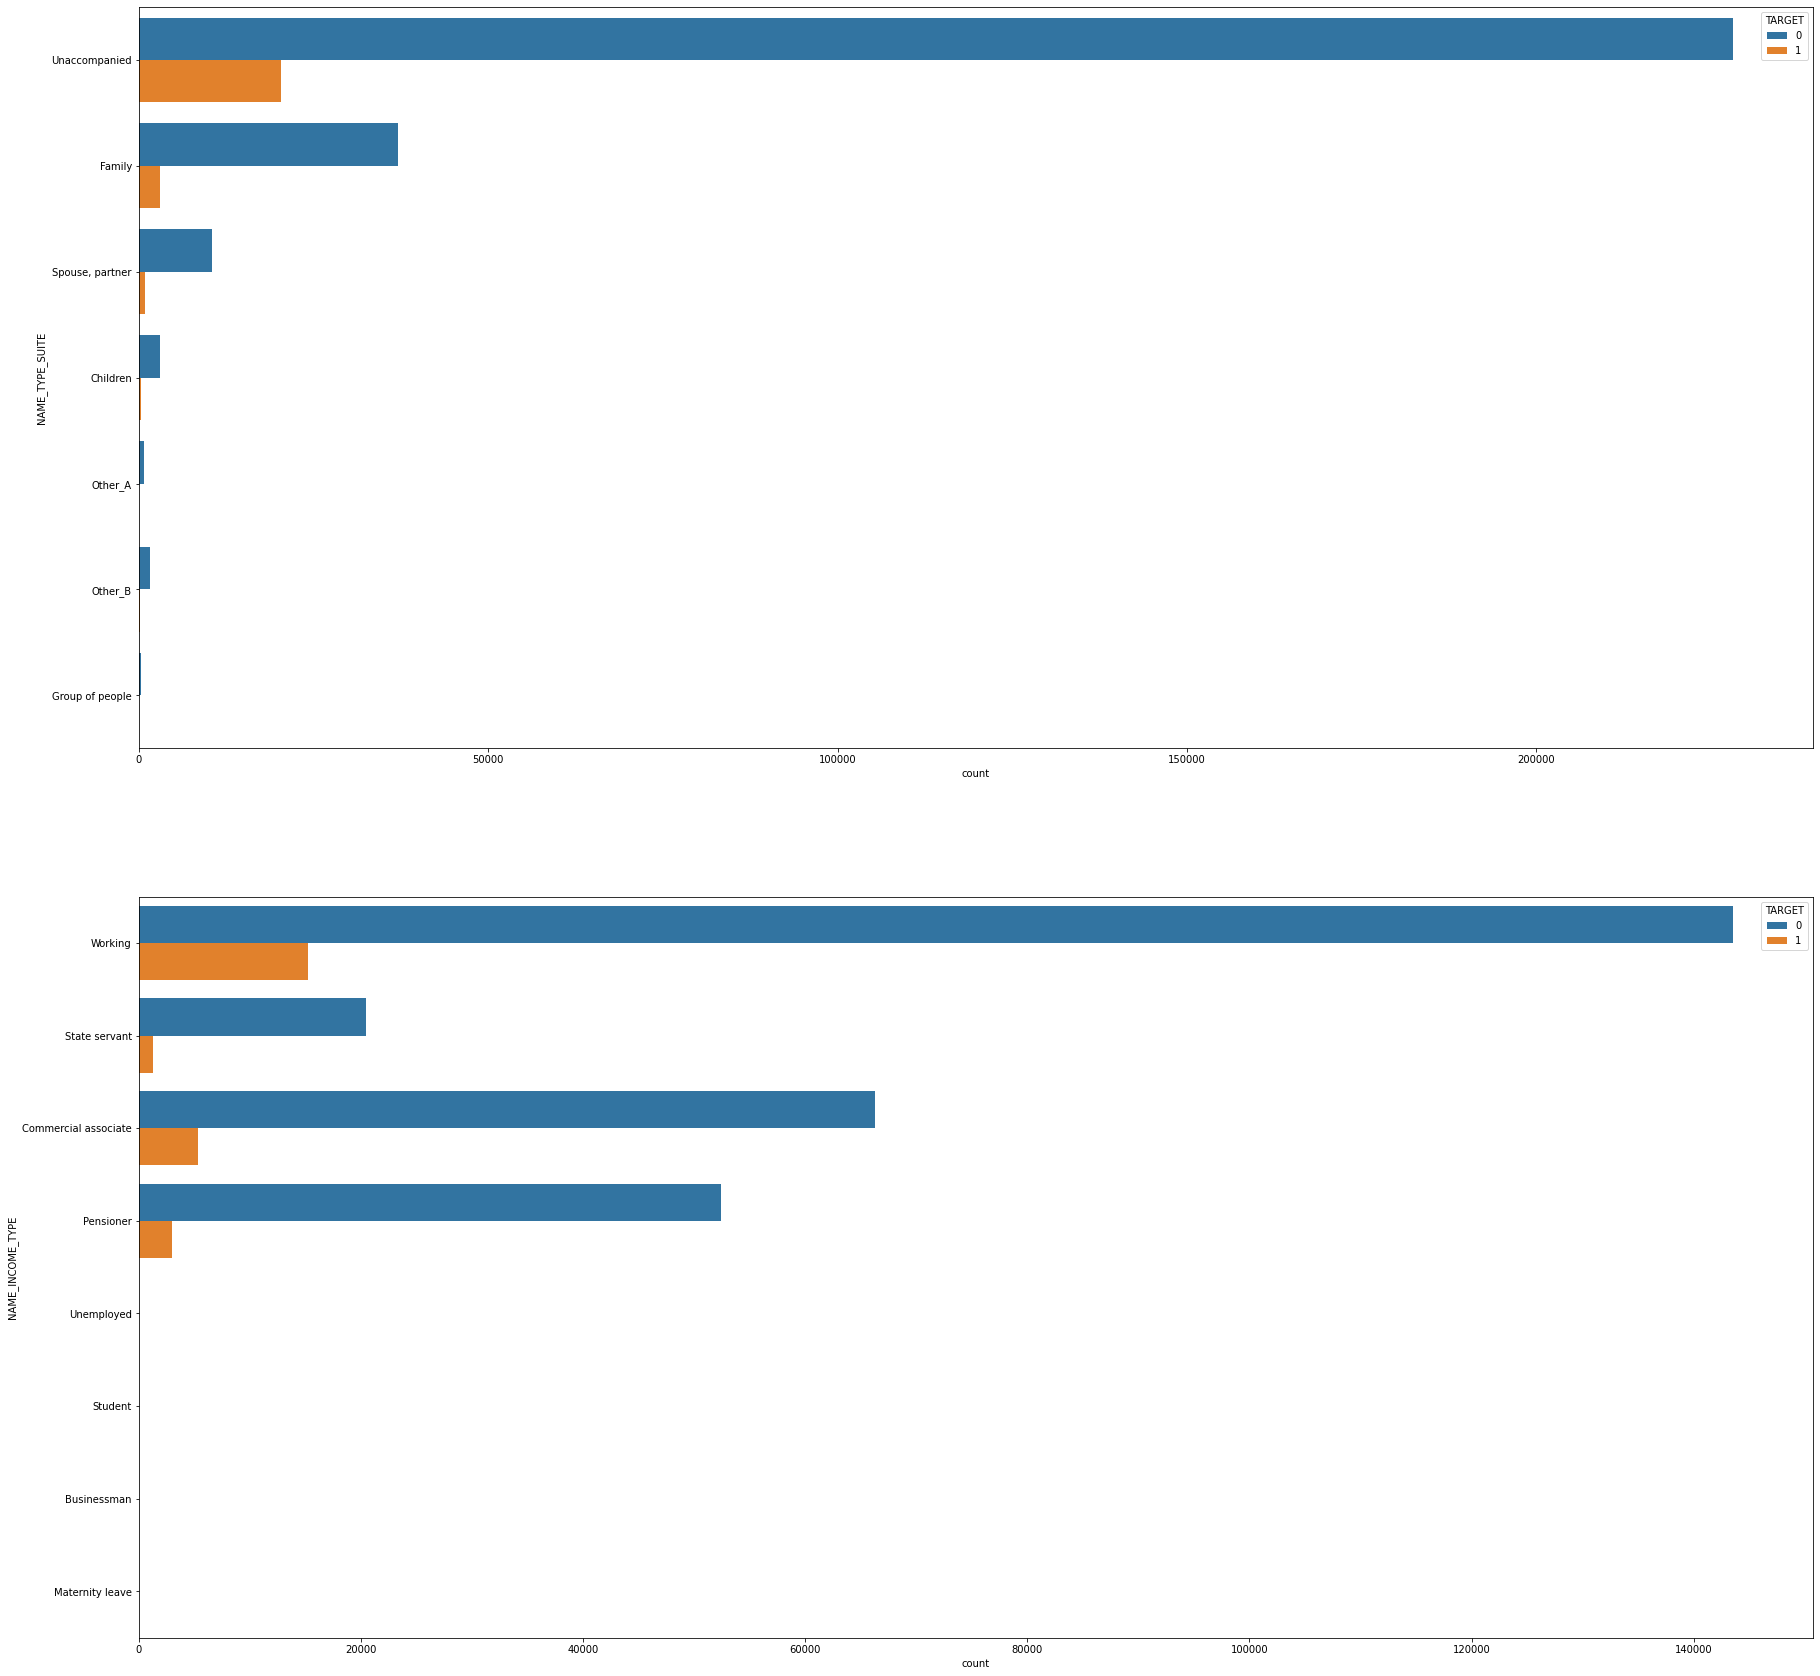

In [ ]:
# Plot counts for each combination of levels.
plt.figure(figsize=(30,30))

plt.subplot(2, 1, 1)
sns.countplot(y="NAME_TYPE_SUITE", hue="TARGET", data=df)
plt.subplot(2, 1, 2)
sns.countplot(y="NAME_INCOME_TYPE", hue="TARGET", data=df)

plt.show()

### Applicant's Contract Type

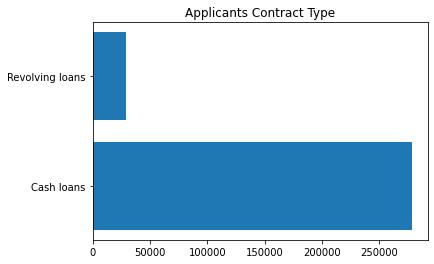

In [ ]:
# Bar chart of grades
plt.barh(df.groupby("NAME_CONTRACT_TYPE")["NAME_CONTRACT_TYPE"].count().index, 
        df.groupby("NAME_CONTRACT_TYPE")["NAME_CONTRACT_TYPE"].count())
plt.title("Applicants Contract Type")

plt.show()

Majority of total loans in this dataset is Cash Loans with about 278K loans. Revolving Loans has significantly lesser number equal to about 29K as compared to cash loans. 

Education Type and Housing Type


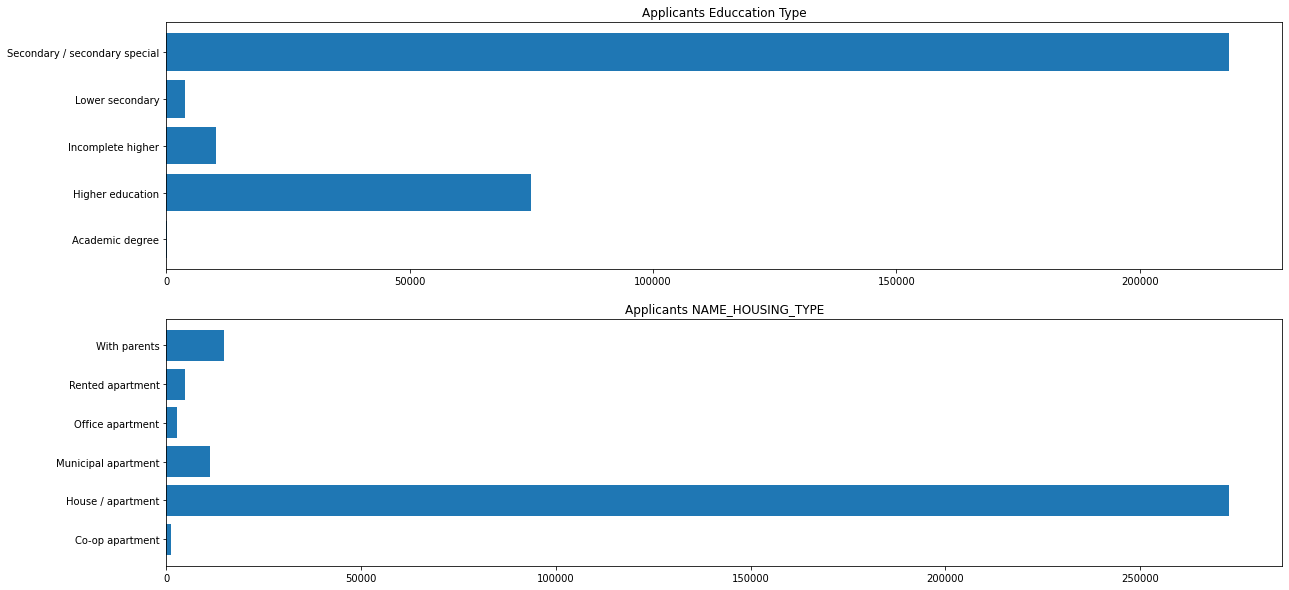

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.barh(df.groupby("NAME_EDUCATION_TYPE")["NAME_EDUCATION_TYPE"].count().index, 
        df.groupby("NAME_EDUCATION_TYPE")["NAME_EDUCATION_TYPE"].count())
plt.title("Applicants Educcation Type")
plt.subplot(2, 1, 2)
plt.barh(df.groupby("NAME_HOUSING_TYPE")["NAME_HOUSING_TYPE"].count().index, 
        df.groupby("NAME_HOUSING_TYPE")["NAME_HOUSING_TYPE"].count())
plt.title("Applicants NAME_HOUSING_TYPE")


plt.show()

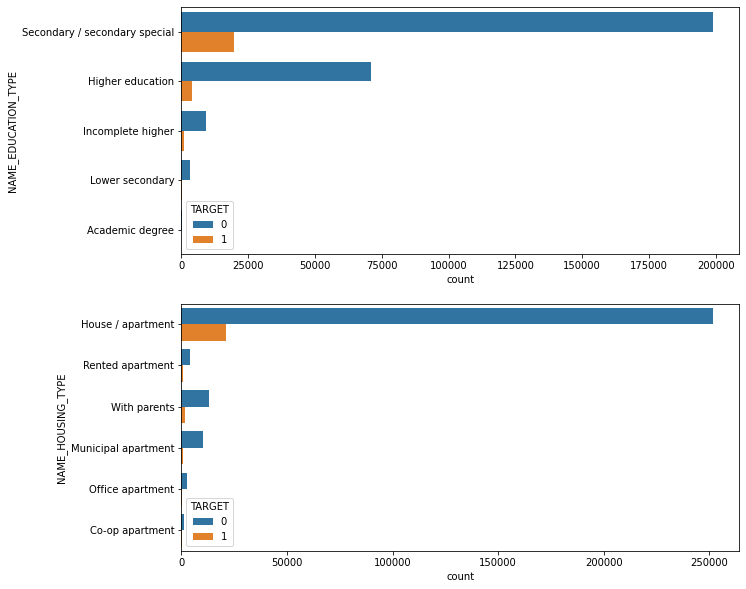

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.countplot(y="NAME_EDUCATION_TYPE", hue="TARGET", data=df)
plt.subplot(2, 1, 2)
sns.countplot(y="NAME_HOUSING_TYPE", hue="TARGET", data=df)

plt.show()

A large number of applications (>200K) are filed by people having secondary education followed by people with Higher Education with 75K applications. Applicants living in House / apartments has the highest number of loan apllications around 270K, While least number of loans are filed bu people with Academic degree


### Which Organization and Occupation Type applies for loan and which repays


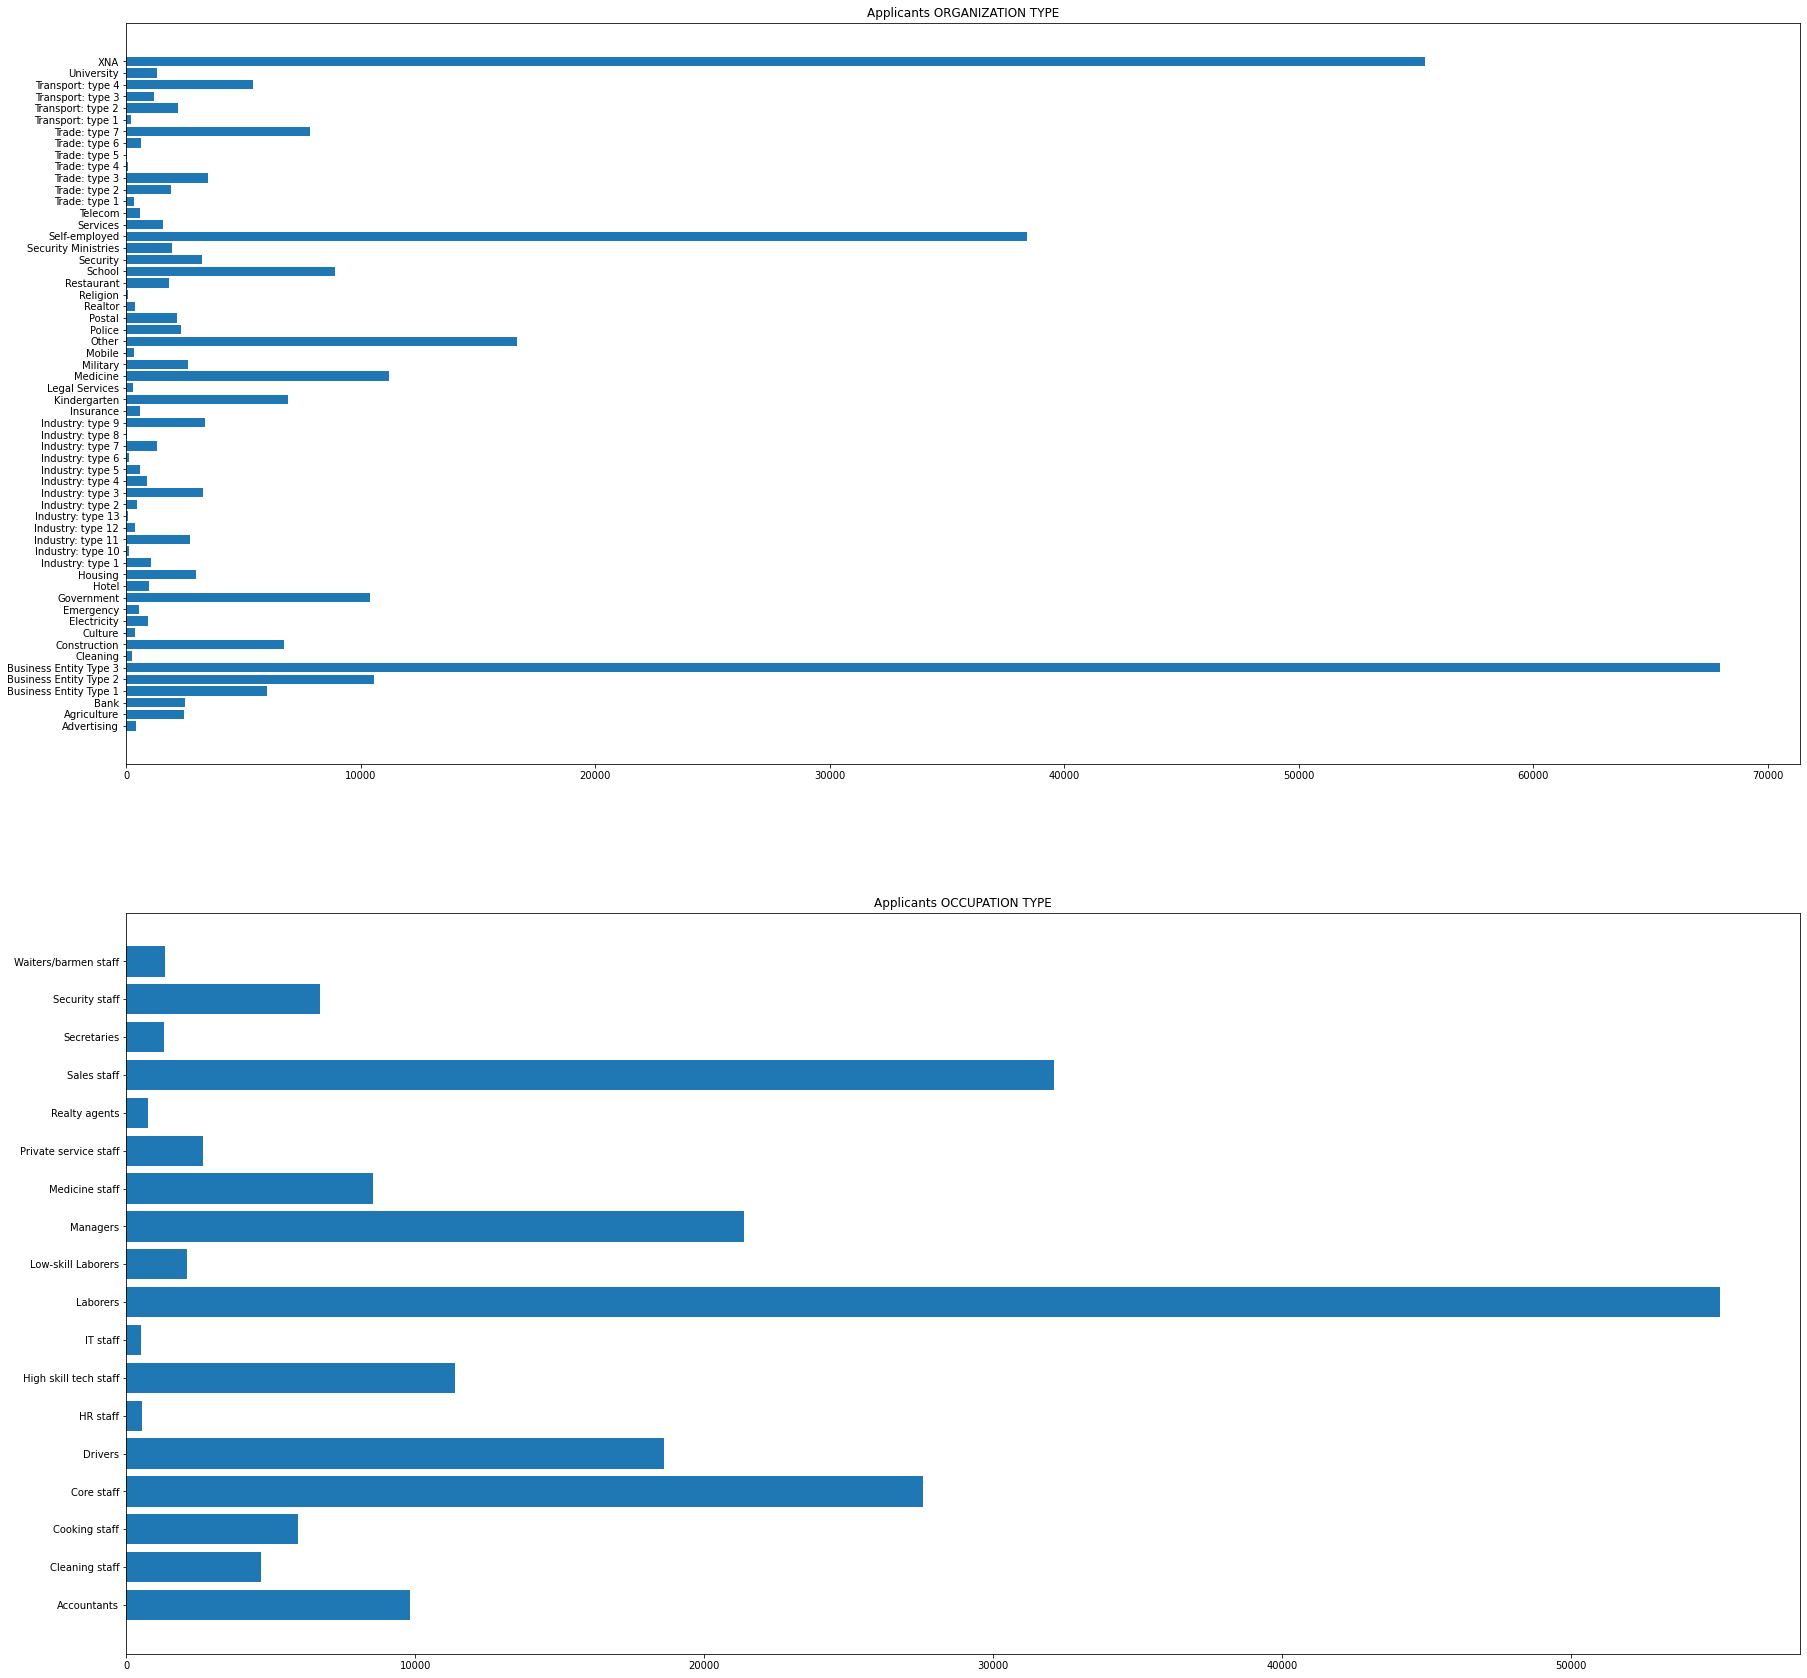

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(2, 1, 1)
plt.barh(df.groupby("ORGANIZATION_TYPE")["ORGANIZATION_TYPE"].count().index, 
        df.groupby("ORGANIZATION_TYPE")["ORGANIZATION_TYPE"].count())
plt.title("Applicants ORGANIZATION TYPE")
plt.subplot(2, 1, 2)
plt.barh(df.groupby("OCCUPATION_TYPE")["OCCUPATION_TYPE"].count().index, 
        df.groupby("OCCUPATION_TYPE")["OCCUPATION_TYPE"].count())
plt.title("Applicants OCCUPATION TYPE")


plt.show()

Top Applicant's who applied for loan : Laborers - Approx 55 K, Sales Staff - Approx 32 K, Core staff - Approx 28 K. Entity Type 3 type organizations have filed maximum number of loans which is aroud > 60K



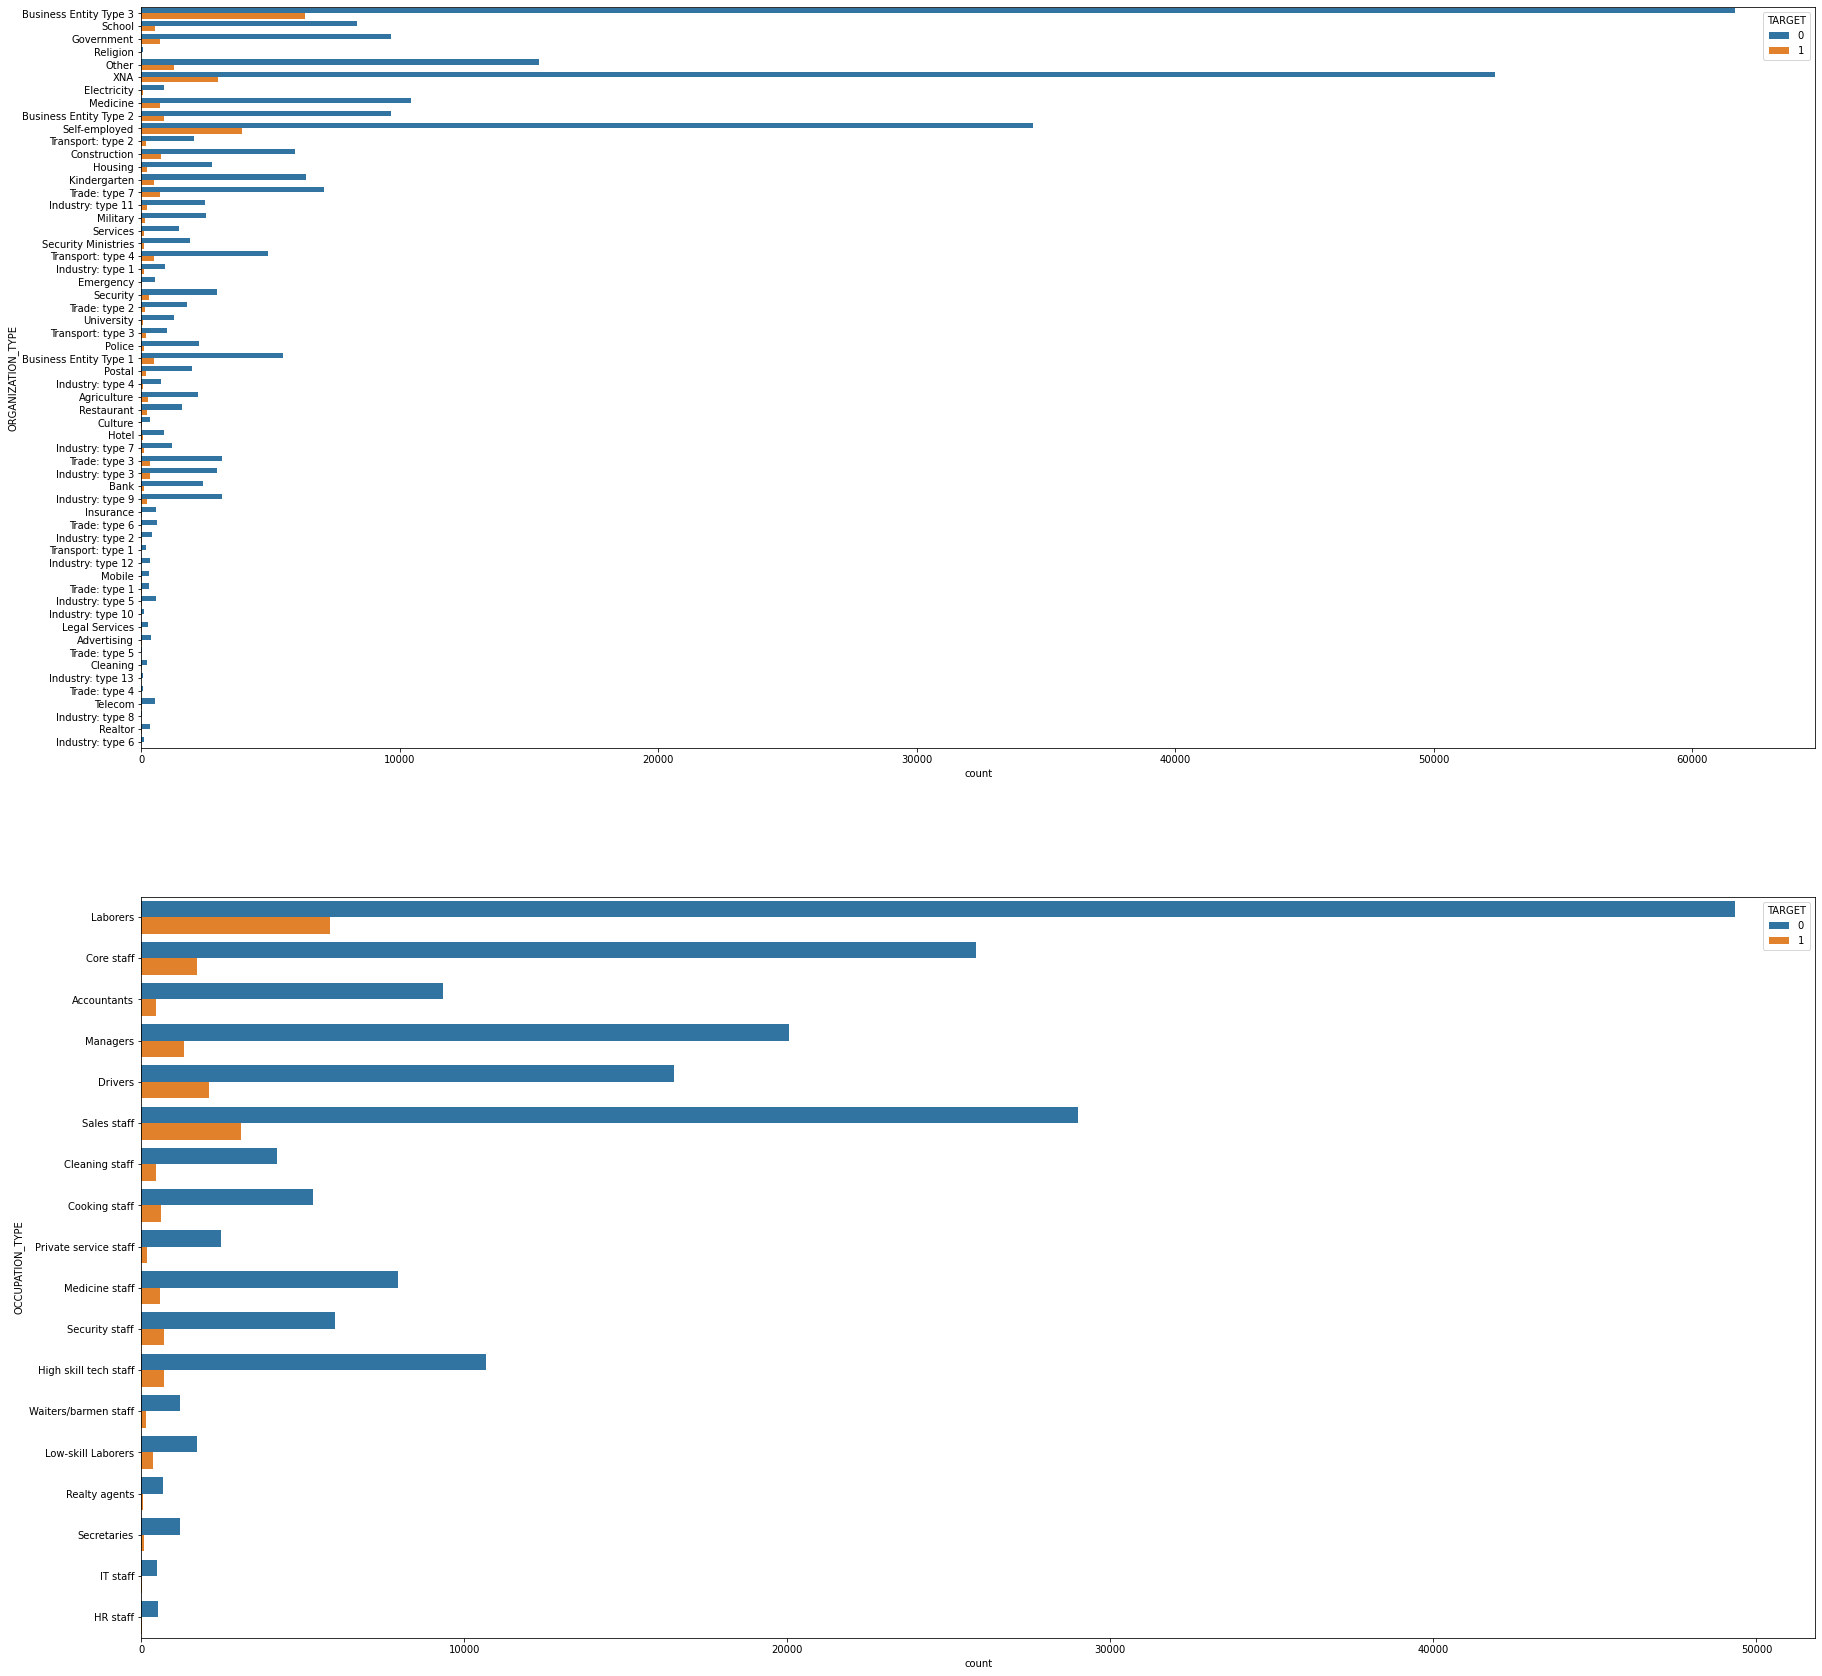

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(2, 1, 1)
sns.countplot(y="ORGANIZATION_TYPE", hue="TARGET", data=df)
plt.subplot(2, 1, 2)
sns.countplot(y="OCCUPATION_TYPE", hue="TARGET", data=df)

plt.show()

### Walls Material and House Type


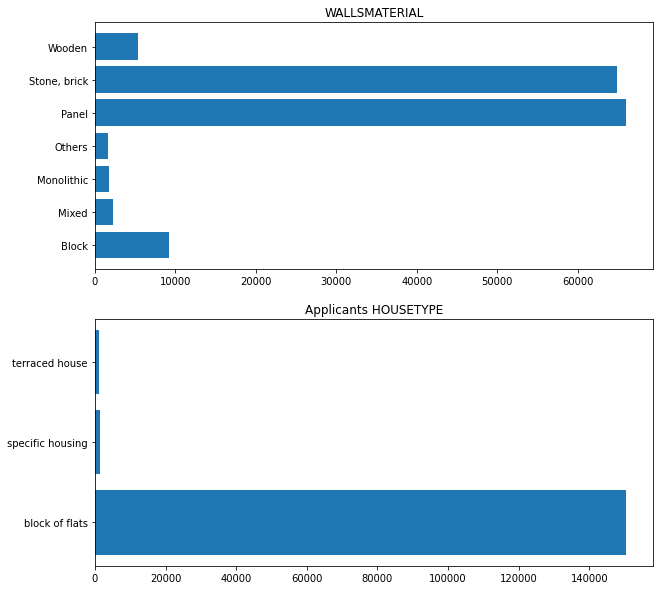

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.barh(df.groupby("WALLSMATERIAL_MODE")["WALLSMATERIAL_MODE"].count().index, 
        df.groupby("WALLSMATERIAL_MODE")["WALLSMATERIAL_MODE"].count())
plt.title("WALLSMATERIAL")
plt.subplot(2, 1, 2)
plt.barh(df.groupby("HOUSETYPE_MODE")["HOUSETYPE_MODE"].count().index, 
        df.groupby("HOUSETYPE_MODE")["HOUSETYPE_MODE"].count())
plt.title("Applicants HOUSETYPE")


plt.show()

"Blocks and Flats" related house types have filed the largest number of loan applications equal to about 150K, rest of the other categories : Specific Housing and Terraced house have less than 1500 applications. Similarly houses having Panel and Stone Brick type walls material have filed the largest applciations close to 120K combined.

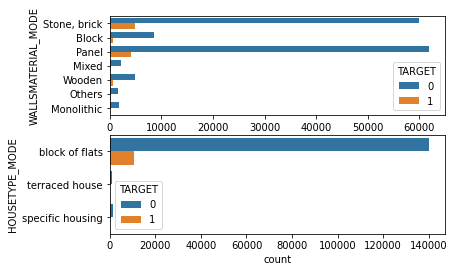

In [ ]:

plt.subplot(2, 1, 1)
sns.countplot(y="WALLSMATERIAL_MODE", hue="TARGET", data=df)
plt.subplot(2, 1, 2)
sns.countplot(y="HOUSETYPE_MODE", hue="TARGET", data=df)

plt.show()

### Distribution of Amount Credit


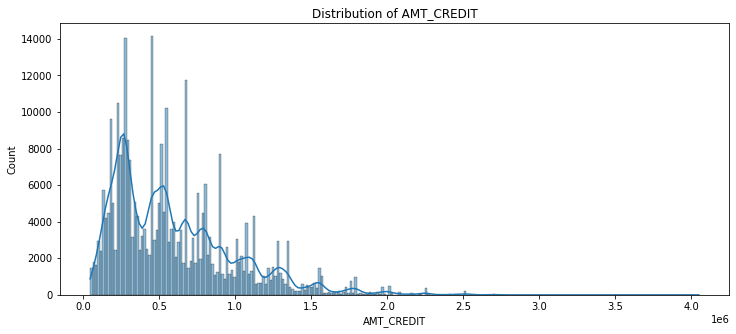

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
sns.histplot(df["AMT_CREDIT"], kde=True)


### Distribution of Amount DAYS_EMPLOYED


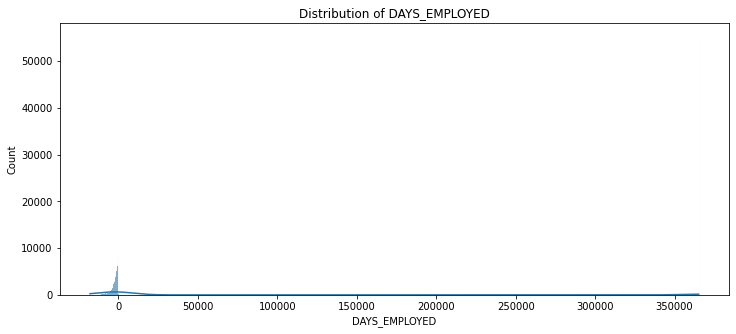

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
sns.histplot(df["DAYS_EMPLOYED"], kde=True)


### How many Family Members does the applicants has 


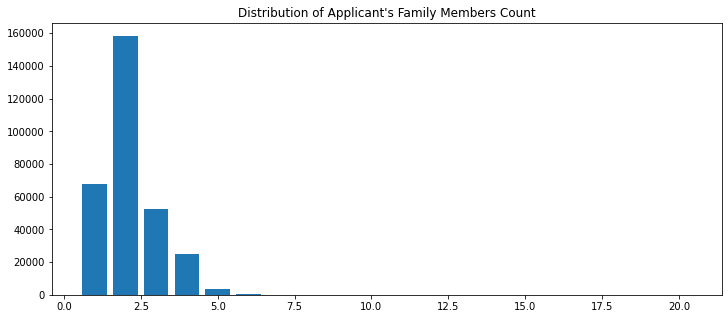

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(df.groupby("CNT_FAM_MEMBERS")["CNT_FAM_MEMBERS"].count().index, 
        df.groupby("CNT_FAM_MEMBERS")["CNT_FAM_MEMBERS"].count())
plt.title("Distribution of Applicant's Family Members Count")


plt.show()

Most of the applicants who applied for loan had 2 family members in total



### How many Children does the applicants have


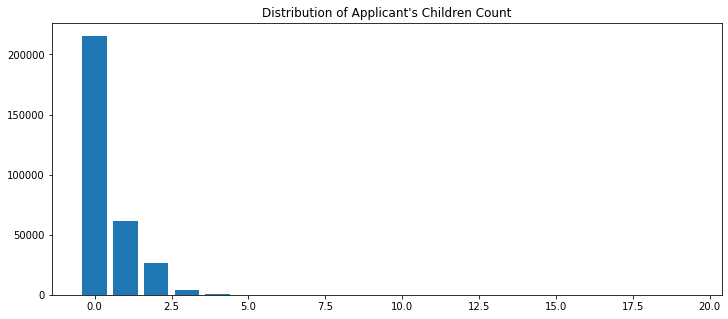

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(df.groupby("CNT_CHILDREN")["CNT_CHILDREN"].count().index, 
        df.groupby("CNT_CHILDREN")["CNT_CHILDREN"].count())
plt.title("Distribution of Applicant's Children Count")


plt.show()

A large majority of applicants did not had children when they applied for loan



#Baseline Model

Let's try baseline models meaning training models like Logistic Regression, Random Forest, Gradient Boost model by considering all the features in the dataset by encoding the categorical variables, imputing missing values. 

In [ ]:
app_train = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform data
            app_train[col] = le.transform(app_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)


Training Features shape:  (307511, 243)


In [ ]:
X = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = app_train['TARGET']

In [ ]:
X.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,0,1,0,0,0,0,0,0,1,0
2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.fillna(X.median(), inplace=True)

In [ ]:
X.nunique()

NAME_CONTRACT_TYPE                                        2
FLAG_OWN_CAR                                              2
FLAG_OWN_REALTY                                           2
CNT_CHILDREN                                             15
AMT_INCOME_TOTAL                                       2548
AMT_CREDIT                                             5603
AMT_ANNUITY                                           13672
AMT_GOODS_PRICE                                        1002
REGION_POPULATION_RELATIVE                               81
DAYS_BIRTH                                            17460
DAYS_EMPLOYED                                         12574
DAYS_REGISTRATION                                     15688
DAYS_ID_PUBLISH                                        6168
OWN_CAR_AGE                                              62
FLAG_MOBIL                                                2
FLAG_EMP_PHONE                                            2
FLAG_WORK_PHONE                         

In [ ]:
# train.isnull().sum()*100/train.count()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Logistic Regression Implementation



In [ ]:
lr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=10000)
lr.fit(x_train, y_train)
lr_cv_scores = cross_val_score(lr, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))
predictions = lr.predict(x_test)

Accuracy scores for the 5 folds:  [0.9192106  0.9192106  0.91916995 0.91920896 0.91918863]
Mean cross validation score: 0.919


Since the dataset is imbalanced dataset, we can't simply rely on Accuracy score, hence let's use confusion matrix to examine model's performance.

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56553     1]
 [ 4949     0]]


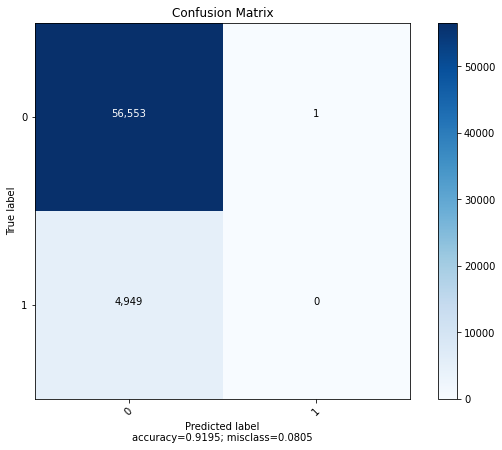

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

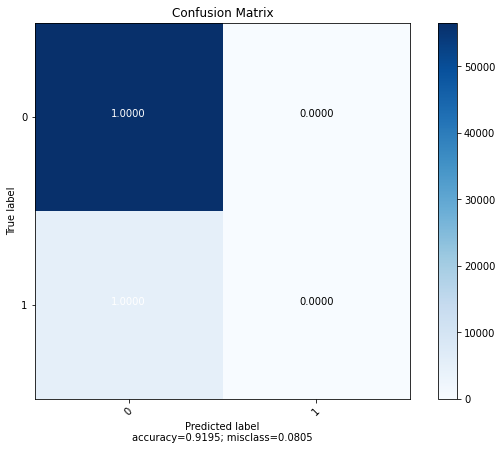

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.00
Recall score: 0.00
F1 score: 0.00
Fbeta score favoring precision: 0.00
FBeta score favoring recall: 0.00


From the confusion matrix plotted above, 

1. we can define true positives (TP) as the number of times that the model correctly predicts the positive class (applicant has payment difficulty to repay the loan)

2. true negatives (TN) as the number of times that the model correctly predicts the negative class (applicant can repay loan)

3. False positives (FP) is the number of times that the model incorrectly predicts the positive class

4. False negatives (FN) is the number of times that the model incorrectly predicts the negative class

Let's analyse the metrics computed from confusion matrix,

**Accuracy**
 
Model is 91% accurate. In other words, this model correctly classified 91% of the applicants whether they can repay loan or not.

**Precision**

Precision is a value that tells you what proportion of positive predictions are correct. 

This model has Precision 0, which means models make positive predictions incorrect all the time.

**Recall**

Recall is a value that tells you what proportion of instances in the positive class were correctly predicted. This is a good indication of how many positive instances are being missed.

This model has Recall 0, which means this model predicts positive class 0% correct out of all applications about loan are repaid











In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [ ]:
result = []

In [ ]:
yproba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Linear Regression - Baseline Model"}
result.append(model_metrics)



#Randomforest Model

 Let's try using a Random Forest on the same training data to see how that affects performance. 

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest.fit(x_train, y_train)
rf_cv_scores = cross_val_score(random_forest, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))
predictions = random_forest.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs

Accuracy scores for the 5 folds:  [0.91925125 0.9192106  0.91927157 0.91931058 0.91929026]
Mean cross validation score: 0.919


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.6s finished


In [ ]:
# Extract feature importances
features = list(X.columns)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

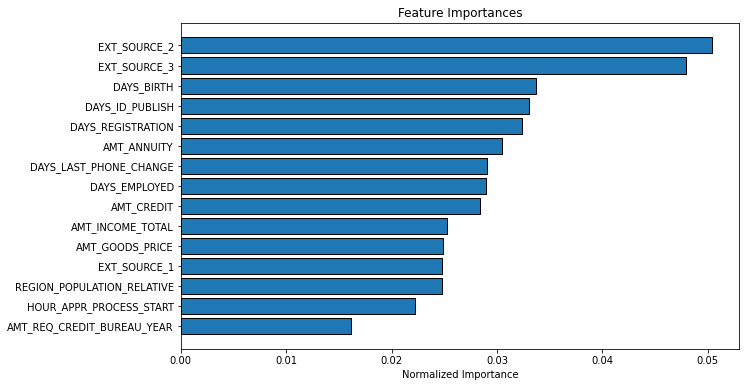

In [ ]:
feature_importances = plot_feature_importances(feature_importances)


In [ ]:
# Make predictions on the test data
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56550     4]
 [ 4944     5]]


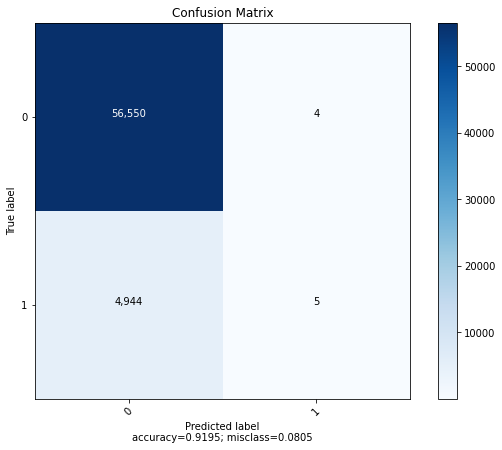

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

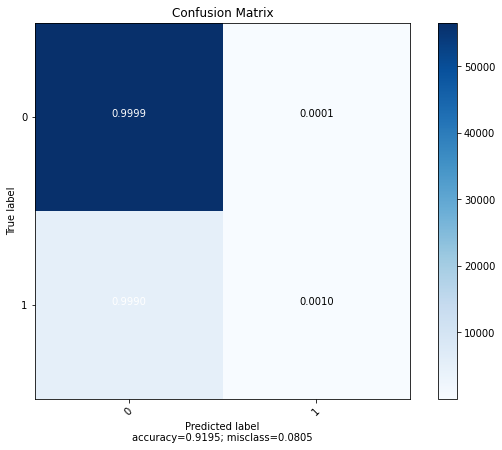

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.56
Recall score: 0.00
F1 score: 0.00
Fbeta score favoring precision: 0.01
FBeta score favoring recall: 0.00


This model is bit improvement to the baseline LR model in terms of precision, meaning if the model predicts the applicants that can't repay loan, it is correct  56%. Recall is 0 still.

In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.56      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



In [ ]:
yproba = random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Rasndom Forest Model"}
result.append(model_metrics)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished


In [ ]:
result

[{'auc': 0.6247078548973337,
  'fpr': array([0.00000000e+00, 1.76822152e-05, 1.76822152e-04, ...,
         9.99593309e-01, 1.00000000e+00, 1.00000000e+00]),
  'name': 'Linear Regression - Baseline Model',
  'tpr': array([0.        , 0.        , 0.        , ..., 0.99979794, 0.99979794,
         1.        ])},
 {'auc': 0.7131943493113794,
  'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76822152e-05,
         1.76822152e-05, 3.53644305e-05, 7.07288609e-05, 7.07288609e-05,
         1.06093291e-04, 1.59139937e-04, 2.47551013e-04, 3.18279874e-04,
         4.77419811e-04, 5.30466457e-04, 6.54241963e-04, 8.48746331e-04,
         1.13166177e-03, 1.43225943e-03, 1.78590374e-03, 2.12186583e-03,
         2.61696785e-03, 3.39498532e-03, 4.43823602e-03, 5.49916894e-03,
         6.63083071e-03, 8.04540793e-03, 1.00965449e-02, 1.22007285e-02,
         1.50298829e-02, 1.82303639e-02, 2.25094600e-02, 2.78141246e-02,
         3.29950136e-02, 3.92191534e-02, 4.67694593e-02, 5.61233511e-0

# Gradient Boost Model

Let's use another powerful technique which is Gradient Boost model, on the same feature set

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gbm = ensemble.GradientBoostingClassifier(**params)
gbm.fit(x_train, y_train)

predictions = gbm.predict(x_test)

In [ ]:
# Extract feature importances
features = list(X.columns)
feature_importance_values = gbm.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

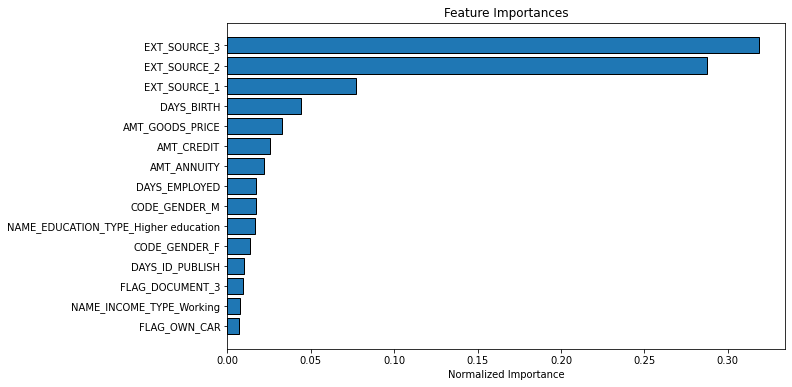

In [ ]:
feature_importances = plot_feature_importances(feature_importances)

In [ ]:
# Make predictions on the test data
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56452   102]
 [ 4840   109]]


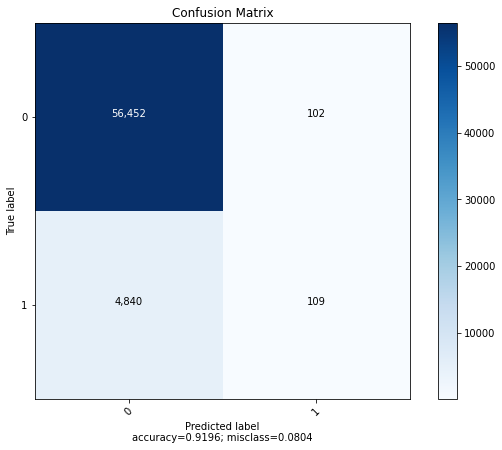

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

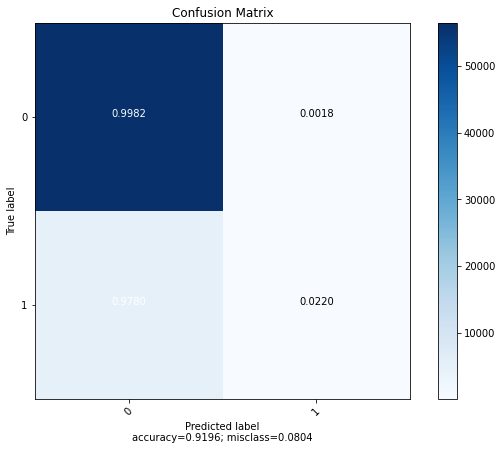

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.52
Recall score: 0.02
F1 score: 0.04
Fbeta score favoring precision: 0.09
FBeta score favoring recall: 0.03


In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.52      0.02      0.04      4949

    accuracy                           0.92     61503
   macro avg       0.72      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



Looking at the above performance metrics, this model has
Precision Score 0.52.

Recall Score improved by 0.02 compared to previous model which means that this model found (only) 2% of all applications who cannot repay loan.(which means that this missed 98% of loans who actually cannot repay the loan)

In [ ]:
yproba = gbm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Gradient Boost Model"}
result.append(model_metrics)

# Models including Domain Features

let's add below new features and see if they contribute to target prediction.

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age


In [ ]:
app_train_domain = app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
X = app_train_domain.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = app_train_domain['TARGET']

In [ ]:
X.fillna(X.median(), inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest.fit(x_train, y_train)
rf_cv_scores = cross_val_score(random_forest, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))
predictions = random_forest.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs

Accuracy scores for the 5 folds:  [0.91925125 0.9192106  0.91923093 0.91926993 0.91929026]
Mean cross validation score: 0.919


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.4s finished


In [ ]:
feature_importance_values

array([3.93982706e-03, 6.98149233e-03, 1.43886247e-04, 4.44415303e-04,
       1.84059839e-03, 2.55400340e-02, 2.21215716e-02, 3.26270842e-02,
       1.07140437e-03, 4.38906022e-02, 1.70609029e-02, 3.48803690e-03,
       9.80253863e-03, 6.61369453e-03, 0.00000000e+00, 0.00000000e+00,
       2.15322377e-03, 0.00000000e+00, 3.76801336e-04, 0.00000000e+00,
       8.31926916e-04, 0.00000000e+00, 5.06884588e-03, 8.80070928e-04,
       0.00000000e+00, 2.50774657e-04, 0.00000000e+00, 3.70580444e-03,
       0.00000000e+00, 0.00000000e+00, 7.70383288e-02, 2.87456145e-01,
       3.18553566e-01, 2.11115190e-04, 6.88651177e-05, 1.20729362e-04,
       0.00000000e+00, 2.54004027e-04, 0.00000000e+00, 0.00000000e+00,
       1.57671881e-03, 2.36425442e-04, 2.55671916e-04, 0.00000000e+00,
       4.51842818e-04, 0.00000000e+00, 0.00000000e+00, 6.17853608e-04,
       1.14931001e-04, 5.61887994e-04, 9.23921501e-05, 0.00000000e+00,
       0.00000000e+00, 1.22960950e-04, 0.00000000e+00, 4.23754760e-04,
      

In [ ]:
# Extract feature importances
features = list(X.columns)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
# Make predictions on the test data
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56551     3]
 [ 4944     5]]


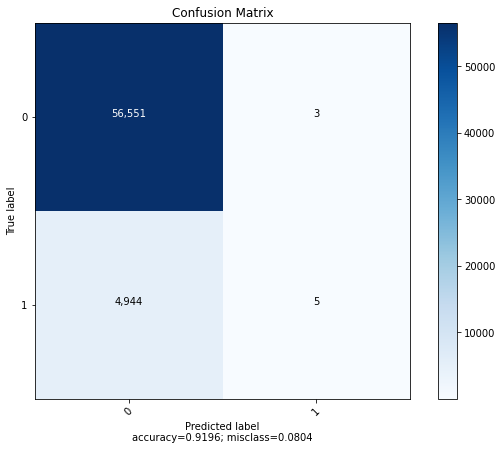

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

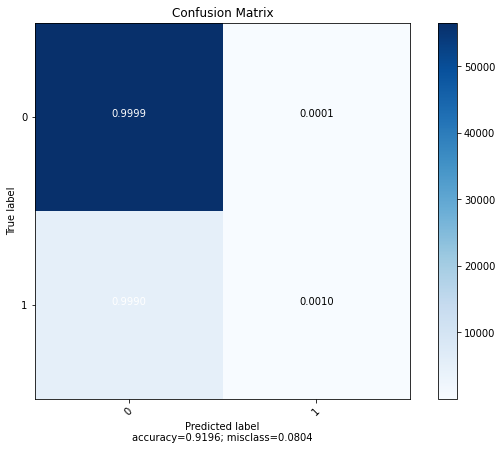

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.62
Recall score: 0.00
F1 score: 0.00
Fbeta score favoring precision: 0.01
FBeta score favoring recall: 0.00


From the above performance metrics, it seems like this model including domain features has no improvement from previous models.

In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.62      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.77      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



In [ ]:
yproba = random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Random Forest Model including Domain Features"}
result.append(model_metrics)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.5s finished


## Gradient Boost Model

let's now try the same data using Gradient Boost Model

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gbm = ensemble.GradientBoostingClassifier(**params)
gbm.fit(x_train, y_train)

predictions = gbm.predict(x_test)

In [ ]:
gbm_cv_scores = cross_val_score(gbm, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', gbm_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(gbm_cv_scores)))
predictions = gbm_cv_scores.predict(x_test)

Accuracy scores for the 5 folds:  [0.91959676 0.91945449 0.91925125 0.91902604 0.91902604]
Mean cross validation score: 0.919


AttributeError: ignored

In [ ]:
# Extract feature importances
features = list(X.columns)
feature_importance_values = gbm.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

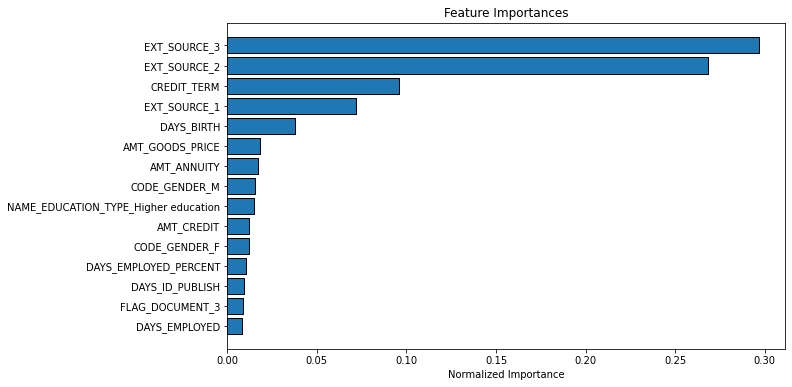

In [ ]:
feature_importances = plot_feature_importances(feature_importances)

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56437   117]
 [ 4820   129]]


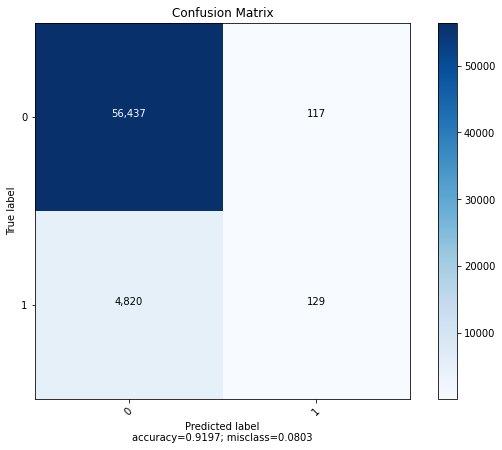

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

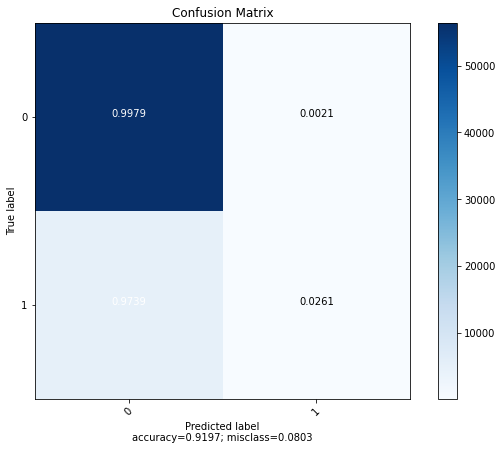

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
# tune hyperparameters by setting learning rate to 1
gbm = ensemble.GradientBoostingClassifier(n_estimators=1000, learning_rate=1, max_features=2, max_depth=2, random_state=0, subsample=0.4)
gbm.fit(x_train, y_train)

predictions = gbm.predict(x_test)

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56437   117]
 [ 4820   129]]


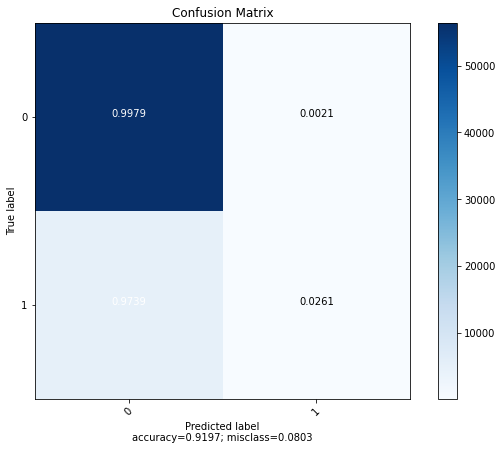

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.52
Recall score: 0.03
F1 score: 0.05
Fbeta score favoring precision: 0.11
FBeta score favoring recall: 0.03


In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.52      0.03      0.05      4949

    accuracy                           0.92     61503
   macro avg       0.72      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



In [ ]:
yproba = gbm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Gradient Boost Model including Domain Features"}
result.append(model_metrics)

# Models with Feature Importance features

Now let's use important features got from above Gradient Boost model and see how it affects performance

In [ ]:
cols = ['CREDIT_TERM','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED_PERCENT', 'DAYS_LAST_PHONE_CHANGE', 'OWN_CAR_AGE', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_DOCUMENT_3']

In [ ]:
X_selected_features = X[cols]


In [ ]:
X_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   CREDIT_TERM                           307511 non-null  float64
 1   EXT_SOURCE_1                          307511 non-null  float64
 2   EXT_SOURCE_2                          307511 non-null  float64
 3   EXT_SOURCE_3                          307511 non-null  float64
 4   DAYS_BIRTH                            307511 non-null  int64  
 5   DAYS_EMPLOYED                         307511 non-null  int64  
 6   AMT_GOODS_PRICE                       307511 non-null  float64
 7   DAYS_ID_PUBLISH                       307511 non-null  int64  
 8   AMT_ANNUITY                           307511 non-null  float64
 9   AMT_CREDIT                            307511 non-null  float64
 10  DAYS_REGISTRATION                     307511 non-null  float64
 11  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.20, random_state=42)

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest.fit(x_train, y_train)
rf_cv_scores = cross_val_score(random_forest, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))
predictions = random_forest.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs

Accuracy scores for the 5 folds:  [0.91957644 0.9192106  0.91949514 0.91908701 0.91916831]
Mean cross validation score: 0.919


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


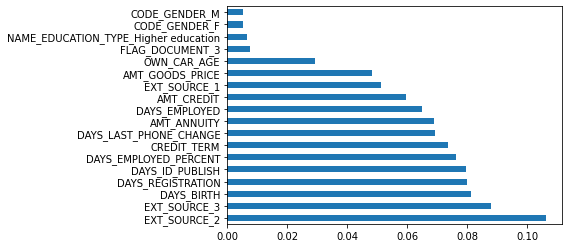

In [ ]:
import matplotlib.pyplot as plt


feat_importances = pd.Series(random_forest.feature_importances_, index=X_selected_features.columns)
feat_importances.nlargest(20).plot(kind='barh')

[[56501    53]
 [ 4898    51]]


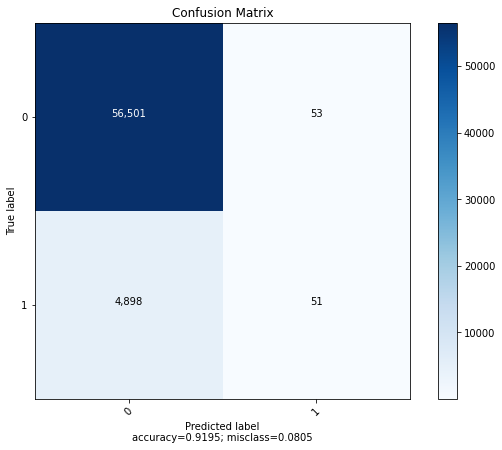

In [ ]:
# Make predictions on the test data
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

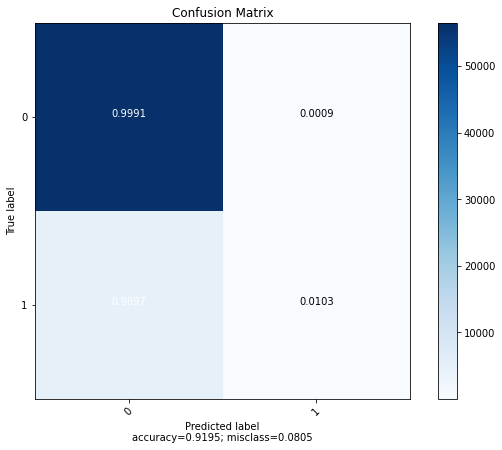

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)



print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.92
Precision score: 0.49
Recall score: 0.01
F1 score: 0.02
Fbeta score favoring precision: 0.05
FBeta score favoring recall: 0.01


From the above metrics, this model seems to have no improvement compaed to previous models.

In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.49      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [ ]:
yproba = random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Random Forest Model with selected features"}
result.append(model_metrics)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


## Gradient Boost Model

let's now try Gradient boost model using same important features we got using feature importances

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gbm = ensemble.GradientBoostingClassifier(**params)
gbm.fit(x_train, y_train)

predictions = gbm.predict(x_test)

KeyboardInterrupt: ignored

In [ ]:
gbm_cv_scores = cross_val_score(gbm, x_train, y_train, cv=5)
print('Accuracy scores for the 5 folds: ', gbm_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(gbm_cv_scores)))

In [ ]:
# Extract feature importances
features = list(X_selected_features.columns)
feature_importance_values = gbm.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

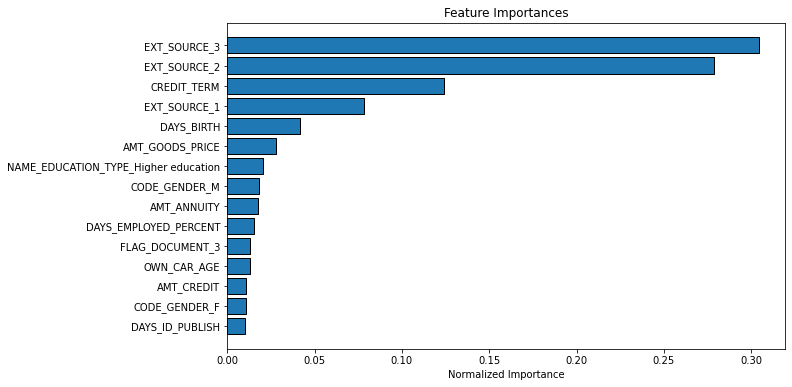

In [ ]:
feature_importances = plot_feature_importances(feature_importances)

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
print(confusion)

[[56449   105]
 [ 4821   128]]


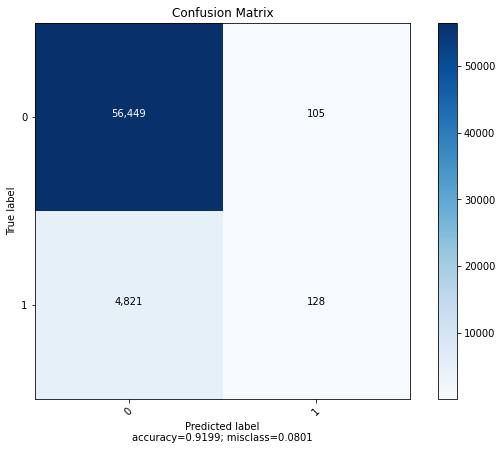

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=False)

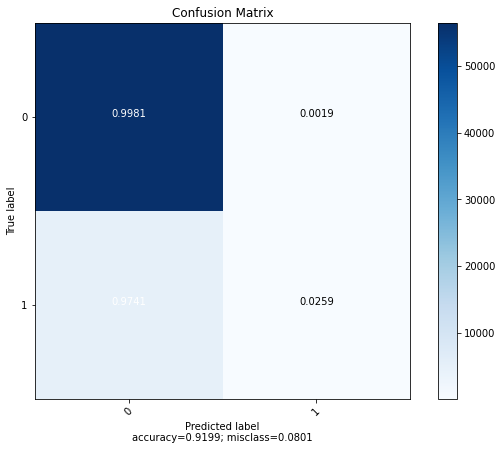

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)

****************************************
Learning rate:  0.05
Accuracy score (training): 0.920
Accuracy score (validation): 0.919


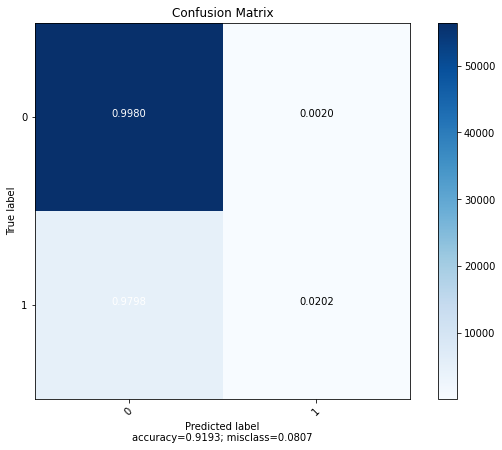

Precision score: 0.47
Recall score: 0.02
F1 score: 0.04
Fbeta score favoring precision: 0.09
FBeta score favoring recall: 0.02
****************************************
****************************************
Learning rate:  0.075
Accuracy score (training): 0.920
Accuracy score (validation): 0.920


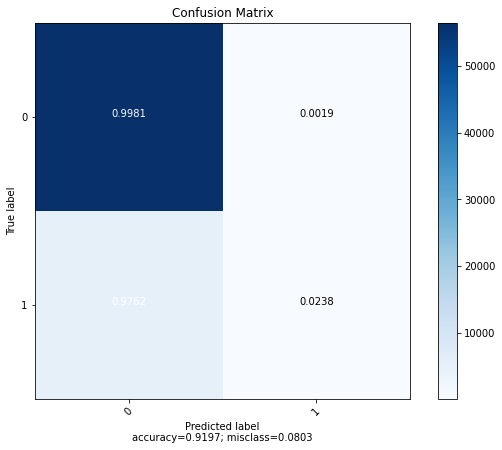

Precision score: 0.52
Recall score: 0.02
F1 score: 0.05
Fbeta score favoring precision: 0.10
FBeta score favoring recall: 0.03
****************************************
****************************************
Learning rate:  0.1
Accuracy score (training): 0.920
Accuracy score (validation): 0.920


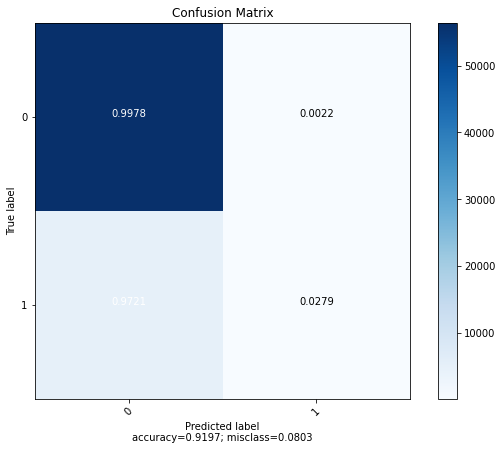

Precision score: 0.52
Recall score: 0.03
F1 score: 0.05
Fbeta score favoring precision: 0.11
FBeta score favoring recall: 0.03
****************************************
****************************************
Learning rate:  0.25
Accuracy score (training): 0.920
Accuracy score (validation): 0.919


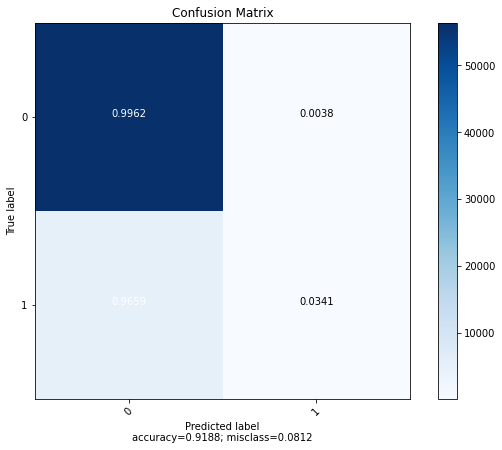

Precision score: 0.44
Recall score: 0.03
F1 score: 0.06
Fbeta score favoring precision: 0.13
FBeta score favoring recall: 0.04
****************************************
****************************************
Learning rate:  0.5
Accuracy score (training): 0.921
Accuracy score (validation): 0.917


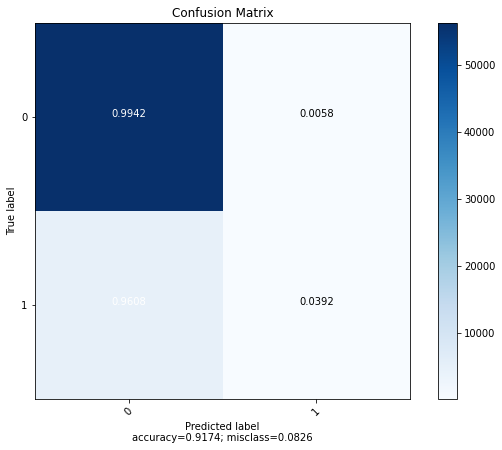

Precision score: 0.37
Recall score: 0.04
F1 score: 0.07
Fbeta score favoring precision: 0.14
FBeta score favoring recall: 0.05
****************************************
****************************************
Learning rate:  0.75
Accuracy score (training): 0.919
Accuracy score (validation): 0.916


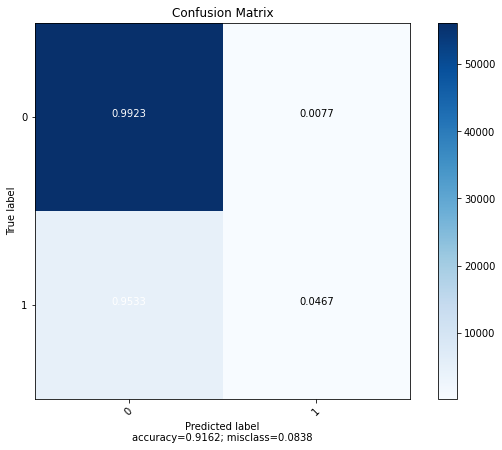

Precision score: 0.35
Recall score: 0.05
F1 score: 0.08
Fbeta score favoring precision: 0.15
FBeta score favoring recall: 0.06
****************************************
****************************************
Learning rate:  1
Accuracy score (training): 0.918
Accuracy score (validation): 0.916


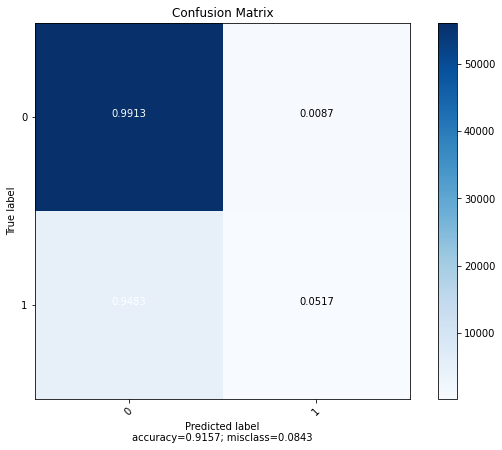

Precision score: 0.34
Recall score: 0.05
F1 score: 0.09
Fbeta score favoring precision: 0.16
FBeta score favoring recall: 0.06
****************************************


In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = ensemble.GradientBoostingClassifier(n_estimators=1000, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0, subsample=0.4)
    gb_clf.fit(x_train, y_train)
    print("****************************************")
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))
    predictions = gb_clf.predict(x_test)
    confusion = confusion_matrix(y_test, predictions, labels=[0, 1])
    plot_confusion_matrix(cm=confusion, target_names = [0, 1], title = 'Confusion Matrix',normalize=True)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
    fbeta_recall = fbeta_score(y_test, predictions, beta=2)
    print('Precision score: {:.2f}'.format(precision))
    print('Recall score: {:.2f}'.format(recall))
    print('F1 score: {:.2f}'.format(f1))
    print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
    print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))
    print("****************************************")

In [ ]:
report = classification_report(y_test, predictions, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.34      0.05      0.09      4949

    accuracy                           0.92     61503
   macro avg       0.63      0.52      0.52     61503
weighted avg       0.88      0.92      0.89     61503



In [ ]:
yproba = gb_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
model_metrics = {"auc": auc, "fpr": fpr, "tpr": tpr, "name": "Gradient Boost Model with selected features"}
result.append(model_metrics)

NameError: ignored

In [ ]:
auc

0.7304423355664564

This model is tried by tuning hyper parameter learning rate, trying different values from 0.05 to 1.

We got precision score of 0.34 and Recall  score of 0.05. This is an improvement to some extent compared to previous models, when we consider to improve recall score.

I think for this usecase, recall is more important than precision. As it is important to identify the applicantion's that can't repay the loan correctly without false negatives than achieving all the applications who can't repay loan are correct.

# Compare various models perfomance using Area under the ROC curves

---



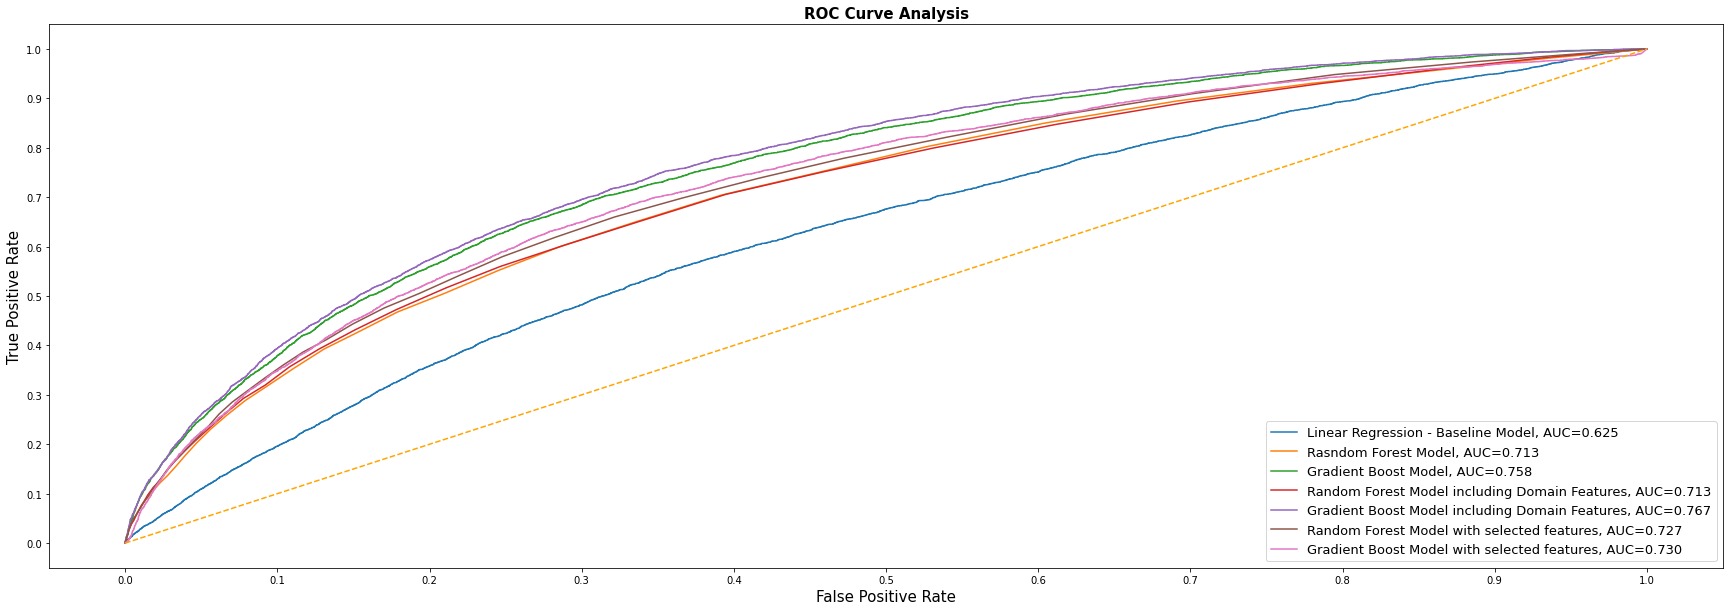

In [ ]:
fig = plt.figure(figsize=(30,10))

for model_info in result:
    plt.plot(model_info['fpr'], 
             model_info['tpr'], 
             label="{}, AUC={:.3f}".format(model_info["name"], model_info['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

ROC REF: https://colab.research.google.com/drive/1zHUQlqmViJbxuxsg4QDfIW_wzP1mO9Ck#scrollTo=2FhGr4mKorjj

It is evident from the plot that the AUC for the GBM including domain features ROC curve is higher than other models ROC curves. Therefore, we can say that GBM including domain features  did a better job of classifying the positive class in the dataset when compared to other models, with auc of 0.767.

# Conclusion

In this capstone, started with understanding the data I have in hand. Then performed Exploratory Data Analysis to understand the missing values, outliers and identify relationships with target and between features. I then performed necessary preprocessing steps such as encoding categorical variables, imputing missing values.I then constructed new features based on the existing data to see if doing so could help our model.

After that, I constructed a baseline model using Logistic Regression which couldn't predict the applications who cannot repay the loan at all. Then I built more complicated models with same feature set to make some improvement on the previous score.

I also tried Random Forest and GBM models including some new features. They seems to have a bit improvement when compared to before including them.

Then I tried with previous GRADIENT BOOST model feature importance based features and on tuning hyperparameters got a bit improved recall score i.e 5% on predicting Target 1(those can't repay).

**Best** **Models**:

GRADIENT BOOST model including domain features has dominant performance in terms of AUC_ROC. Also, GRADIENT BOOST model with selected features yield great scores in Recall.

So GRADIENT BOOST model with domain features, with selected features have best results.

# Next Steps

Try experimenting with other feature selection methods like
1. Removing missing values more than certain threshold
2. Remove any features with a zero importance as determined by a gradient boosting machine.
3. Avoid one hot encoding categorical features having unique values greater than like 20 values
4. Since the classes are imbalanced, try downsampling majority class?
5. Instead of imputing the missing values of both classes together, try to divide into 2 groups based on target class, and then impute with right strategy.
6. See which class have more missing values.(may be think of next steps looking in to  that)

Using the above methods, try different models and evaluate performance. These methods also decreases the number of features decreasing the model's runtime.